![example](images/life-expectancy.svg)

# World Life Expectancy

**Authors:** Ngoc Ho
***

## Overview

Previously there were many studies on linear regression model to predict life expectancy however in most of them, affect of immunization and human development index was not taken into account. This project aims to build a regression model to predict life expectancy and investigate which factors affect life expectancy in the world with data of immunisation and human development included. A country can use this model to predict life expectancy and determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.This model will be devrived from WHO life expectancy with data from every countries between 2000-2015 using statsmodel library in Python. From our model we found 9 significant factors contributing to life expectancy and the model is able to predict life expectancy to high level of accuracy.  

## Business Problem

Life Expectancy is affected by various factors. WHO wishes to predict life expectancy and determine which factors has significant impact. From this project, WHO would be able to give a country its life expectancy and suggestions on which factor to focus on to improve their life expectancy. 

***
Questions to consider:
* Do various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy
* What is the impact of Immunization coverage on life Expectancy?
* Do densely populated countries tend to have lower life expectancy?
* What is the impact of schooling on the lifespan of humans?
***

## Data Understanding

The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. The data set has 22 columns and 2938 entries. Out of 22 colums, 20 predicting factors (independent variables). Our dependent variable is life expectancy in years. We will examine the relationship of these factors and life expectancy value using correlation analysis. These features will also be used to investigate their effect on life expectancy and be selected to be included in a multilinear regression model to predict life expectancy value.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import metrics
import pickle

%matplotlib inline

**Data Exploration**

In [2]:
df = pd.read_csv('data/Life Expectancy Data.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

## Data Preparation

- Life Expectancy is our dependent variable, the remaining columns except for country and year is our independent variable. We will drop both country and year as they do not have a reasonable cause to have an effect on life expectancy. 
- As null values affects our regression model, we will check for nulls and replace all numerical values with median() as median is less likely to be affected by outliers
- Outliers will be investigated and remove if neccesary
- Categorical variable i.e 'status' will be converted to dummies 
- All columns will be renamed for consistency


**Data cleaning**
- Checking for nulls 

In [5]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

- Checking for duplicates

In [6]:
df.duplicated().sum()

0

- Filling in nulls values

In [7]:
#We have nulls to take care of them to allow our regression model to work
#Filling all nulls with median values
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [8]:
df['Life expectancy '].fillna(df['Life expectancy '].median(), inplace=True)
df['Life expectancy '].isna().sum()

0

In [9]:
df['Adult Mortality'].fillna(df['Adult Mortality'].median(), inplace=True)
df['Adult Mortality'].isna().sum()

0

In [10]:
df['Alcohol'].fillna(df['Alcohol'].median(), inplace=True)
df['Alcohol'].isna().sum()

0

In [11]:
df['Hepatitis B'].fillna(df['Hepatitis B'].median(), inplace=True)
df['Hepatitis B'].isna().sum()

0

In [12]:
df[' BMI '].fillna(df[' BMI '].median(), inplace=True)
df[' BMI '].isna().sum()

0

In [13]:
df['Polio'].fillna(df['Polio'].median(), inplace=True)
df['Polio'].isna().sum()

0

In [14]:
df['Total expenditure'].fillna(df['Total expenditure'].median(), inplace=True)
df['Total expenditure'].isna().sum()

0

In [15]:
df['Diphtheria '].fillna(df['Diphtheria '].median(), inplace=True)
df['Diphtheria '].isna().sum()

0

In [16]:
df['GDP'].fillna(df['GDP'].median(), inplace=True)
df['GDP'].isna().sum()

0

In [17]:
df['Population'].fillna(df['Population'].median(), inplace=True)
df['Population'].isna().sum()

0

In [18]:
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(), inplace=True)
df[' thinness  1-19 years'].isna().sum()

0

In [19]:
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].median(), inplace=True)
df[' thinness 5-9 years'].isna().sum()

0

In [20]:
df['Income composition of resources'].fillna(df['Income composition of resources'].median(), inplace=True)
df['Income composition of resources'].isna().sum()

0

In [21]:
df['Schooling'].fillna(df['Schooling'].median(), inplace=True)
df['Schooling'].isna().sum()

0

In [22]:
#one hot coding categorical variable of status 
status_dummies = pd.get_dummies(df['Status'], prefix='status', drop_first=True)

#Dropping year, country and status to clean up dataframe only contain dependent and independent variables in interest
df_1 = df.drop(['Status','Country', 'Year'], axis=1)
df_1 = pd.concat([df_1, status_dummies], axis=1)
df_1

Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0                 65.0            263.0             62     0.01   
1                 59.9            271.0             64     0.01   
2                 59.9            268.0             66     0.01   
3                 59.5            272.0             69     0.01   
4                 59.2            275.0             71     0.01   
...                ...              ...            ...      ...   
2933              44.3            723.0             27     4.36   
2934              44.5            715.0             26     4.06   
2935              44.8             73.0             25     4.43   
2936              45.3            686.0             25     1.72   
2937              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358879  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  status_Developing  
0                               0.479       10.1                  1  
1                               0.476       10.0                  1  
2                               0.470        9.9                  1  
3                               0.463        9.8                  1  
4                               0.454        9.5                  1  
...                               ...        ...                ...  
2933                            0.407        9.2                  1  
2934                            0.418        9

In [23]:
#renaming the columns 
df_1.rename({' thinness  1-19 years' : 'thinness_1_19yrs', ' thinness 5-9 years' : 'thinness_5_9yrs'
            , 'Income composition of resources' : 'Income_composition_of_resources',
            'infant deaths' : 'infant_death', 'Total expenditure' : 'Total_expenditure',
            'Hepatitis B' : 'Hepatitis_B', 'Life expectancy ' : 'Life_expectancy', 
            'Adult Mortality' : 'Adult_Mortality', 'percentage expenditure' : 'percentage_expenditure',
            'under-five deaths ' : 'under_five_deaths', ' HIV/AIDS' : 'HIV_AIDS', 'Measles ' : 'Measles'}, axis=1, inplace=True)
df_1.head()

Life_expectancy  Adult_Mortality  infant_death  Alcohol  \
0             65.0            263.0            62     0.01   
1             59.9            271.0            64     0.01   
2             59.9            268.0            66     0.01   
3             59.5            272.0            69     0.01   
4             59.2            275.0            71     0.01   

   percentage_expenditure  Hepatitis_B  Measles   BMI   under_five_deaths  \
0               71.279624         65.0     1154   19.1                 83   
1               73.523582         62.0      492   18.6                 86   
2               73.219243         64.0      430   18.1                 89   
3               78.184215         67.0     2787   17.6                 93   
4                7.097109         68.0     3013   17.2                 97   

   Polio  Total_expenditure  Diphtheria   HIV_AIDS         GDP  Population  \
0    6.0               8.16         65.0       0.1  584.259210  33736494.0   
1   58.0               8.18         62.0       0.1  612.696514    327582.0   
2   62.0               8.13         64.0       0.1  631.744976  31731688.0   
3   67.0               8.52         67.0       0.1  669.959000   3696958.0   
4   68.0               7.87         68.0       0.1   63.537231   2978599.0   

   thinness_1_19yrs  thinness_5_9yrs  Income_composition_of_resources  \
0              17.2             17.3                            0.479   
1              17.5             17.5                            0.476   
2              17.7             17.7                            0.470   
3              17.9             18.0                            0.463   
4              18.2             18.2                            0.454   

   Schooling  status_Developing  
0       10.1                  1  
1       10.0                  1  
2        9.9                  1  
3        9.8                  1  
4        9.5                  1

In [24]:
df_1.columns = [col.strip() for col in df_1.columns]
df_1.columns

Index(['Life_expectancy', 'Adult_Mortality', 'infant_death', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19yrs', 'thinness_5_9yrs',
       'Income_composition_of_resources', 'Schooling', 'status_Developing'],
      dtype='object')

**Removing outliers**

In [25]:
print(df_1.columns)

Index(['Life_expectancy', 'Adult_Mortality', 'infant_death', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19yrs', 'thinness_5_9yrs',
       'Income_composition_of_resources', 'Schooling', 'status_Developing'],
      dtype='object')


In [26]:
df_1.shape

(2938, 20)

In [27]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

index_list = []
for feature in ['Life_expectancy', 'Adult_Mortality', 'infant_death', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19yrs', 'thinness_5_9yrs',
       'Income_composition_of_resources', 'Schooling', 'status_Developing']:
    index_list.extend(outliers(df_1, feature))

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
df_cleaned = remove(df_1, index_list)
df_cleaned.shape

(865, 20)

**We lost more than half of data after removing outliers hence we will not remove outliers and continue with full dataset.**

## Data Modeling
**Baseline model**

We found that after removing outliers out dataset reduced from 2380 entries to only 865 entries therefore a decision is made to keep all entries in dataset. 

All features were included in the model. Adjusted R2 value, residual error values and residual mean square errors (RMSE) are noted as baseline for comparison.

**Model 1**

Only significant features are selected for the model based on stepwise selection. These features must have reasonable linear correlation coefficience with dependent variable life expectancy (correlation value of of >= 0.4 or <= -0.4) and are roughly normally distributed. 

The model is evaluated. Adjusted R2, residual error, RMSE and Jacque Bera value, condition number are analysis to assess multicollinearity and effects of outliers.

**Model 2**

In this model, multicollinearity is removed. After checking for multicollinearity, we found Income_composition_of_resources and schooling has a strong multicollinearity. We decided to keep the schooling and removed Income_composition_of_resources because one of our focus quesition is finding the effect of schooling on life expectancy. 

Also in this model, both features and dependent variable undergo normalisation process using log transformation and the standardisation process to make continuous features more noramlly distributed. Linear regression operates under various assumptions including that the dependent variable can be decomposed into a linear combination of the independent features. Additionally, data should be homoscedastic and the residuals should follow a normal distribution. Having the data more normally distributed will benefit our model and model performance in general. So while normality of the predictors is not a mandatory assumption, having (approximately) normal features may be helpful for the model.

**Model 3 - Final model**

All continous features undergo feature scalling using standardisation (mean normalisation) making all features on the same scale of having mean of 0 and standard deviation of 1. Our dataset contains features that vary largely in magnitudes. If these magnitudes unchanged, coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others.

**Validation**

At each iteration of the model, evaluation process of the model were done using residual plots for the error term for variance and heteroscedasticity, QQ plot to check normality assumptions. Adjusted R2 and RMSE value also compared to track the tranformation of the model.

Now that we have all our variable in numerical values, let's check each independent's distribution, their linearity and correlation with life expectancy so we can narrow down the significant variables.

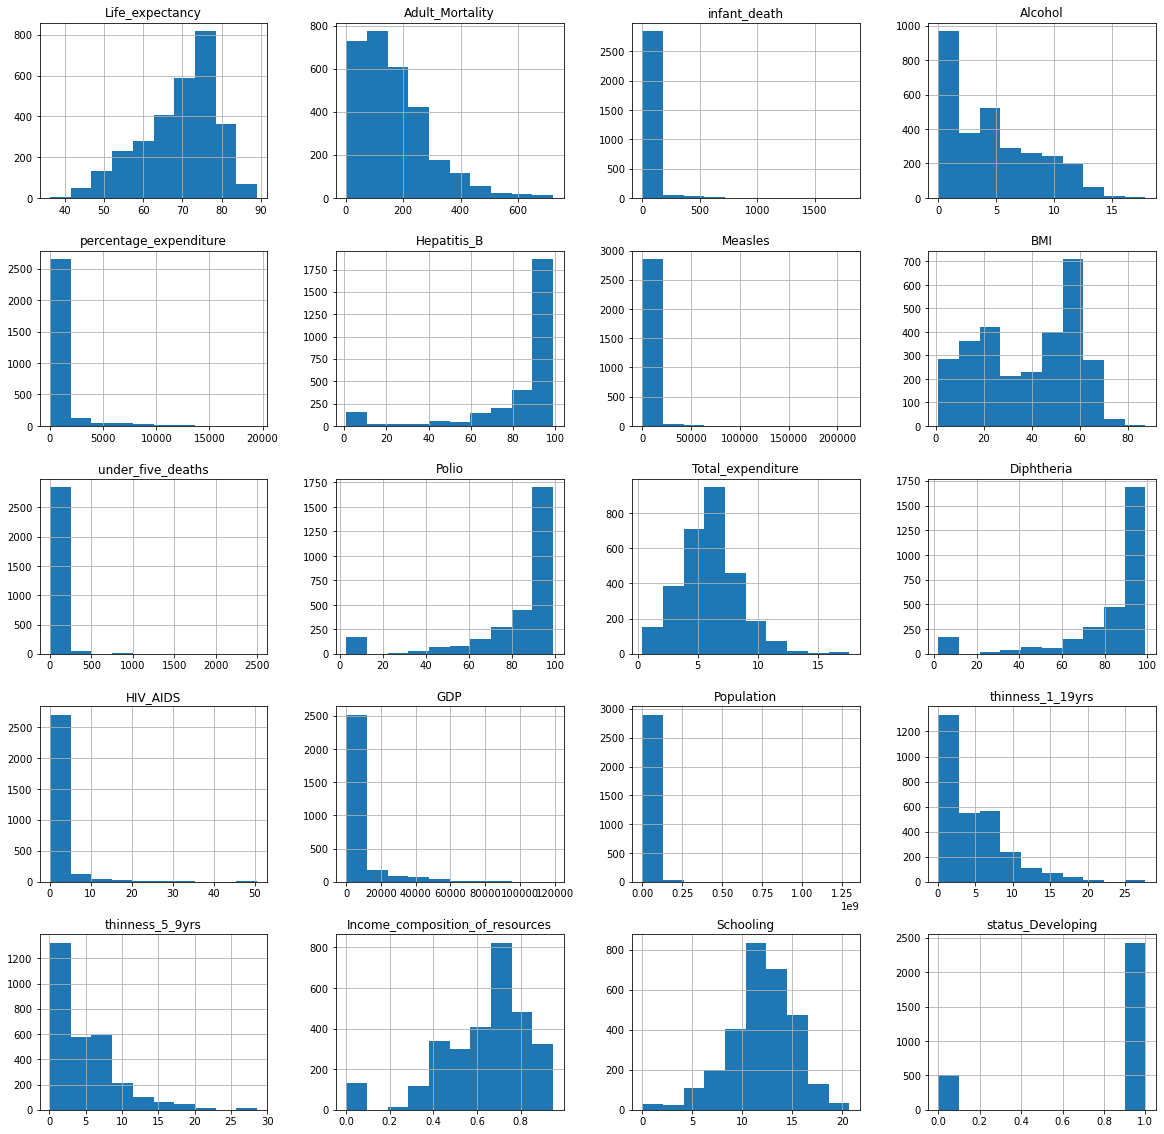

In [28]:
#Plotting distribution using histograms 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_1.hist(ax = ax);

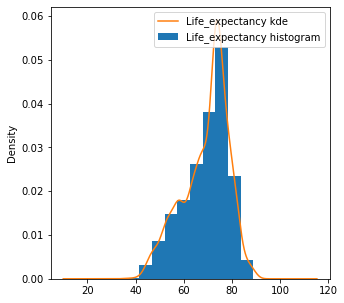

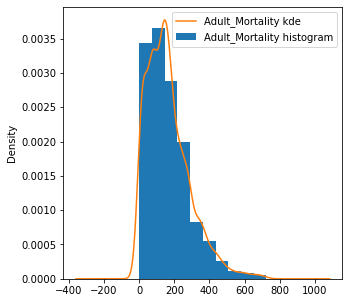

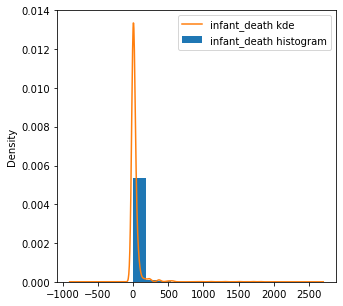

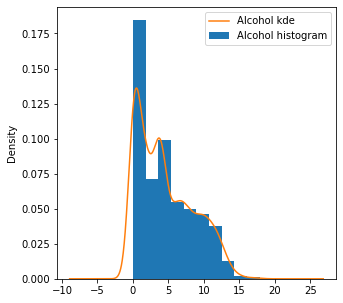

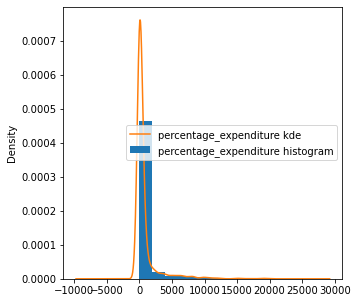

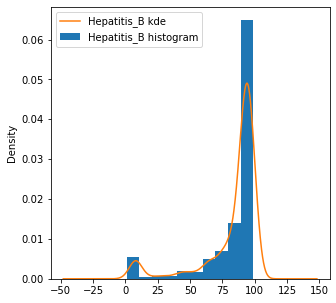

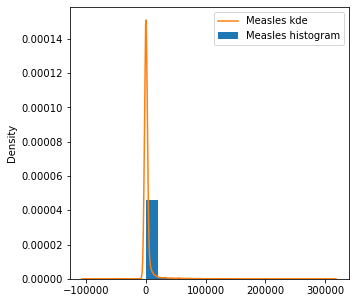

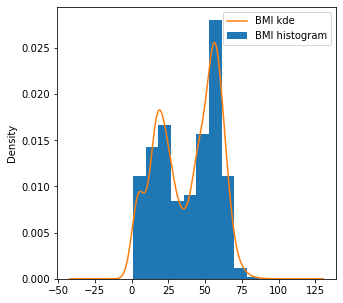

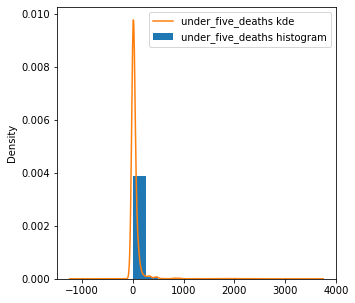

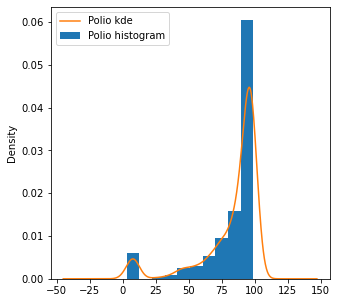

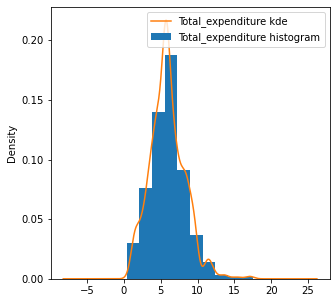

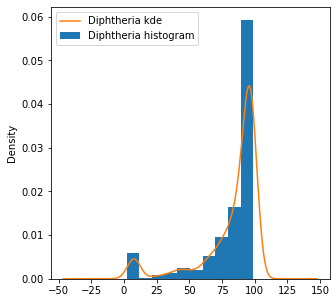

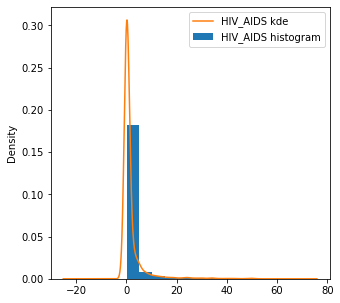

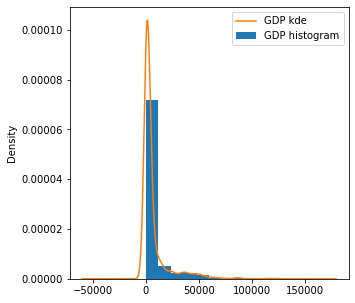

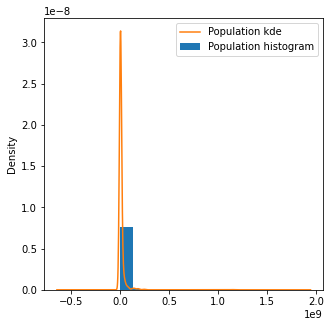

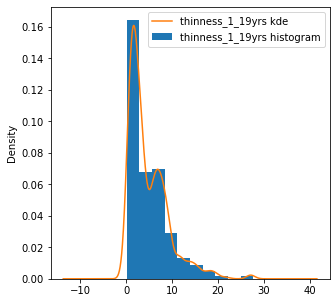

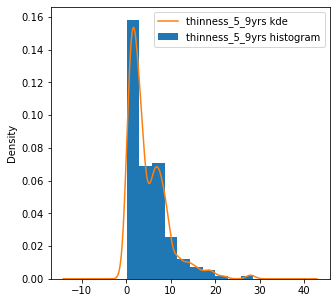

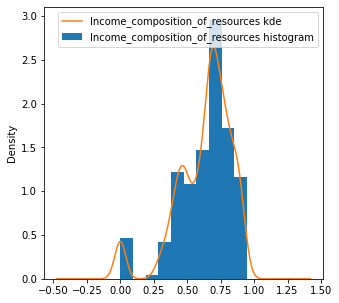

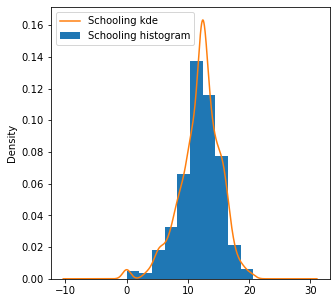

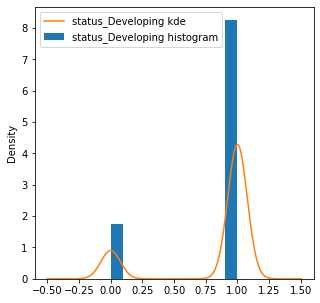

In [29]:
#KDE plots
for column in df_1:
    ax_1 = plt.subplots(figsize= (5,5))
    df_1[column].plot.hist(density=True, label = column+' histogram')
    df_1[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

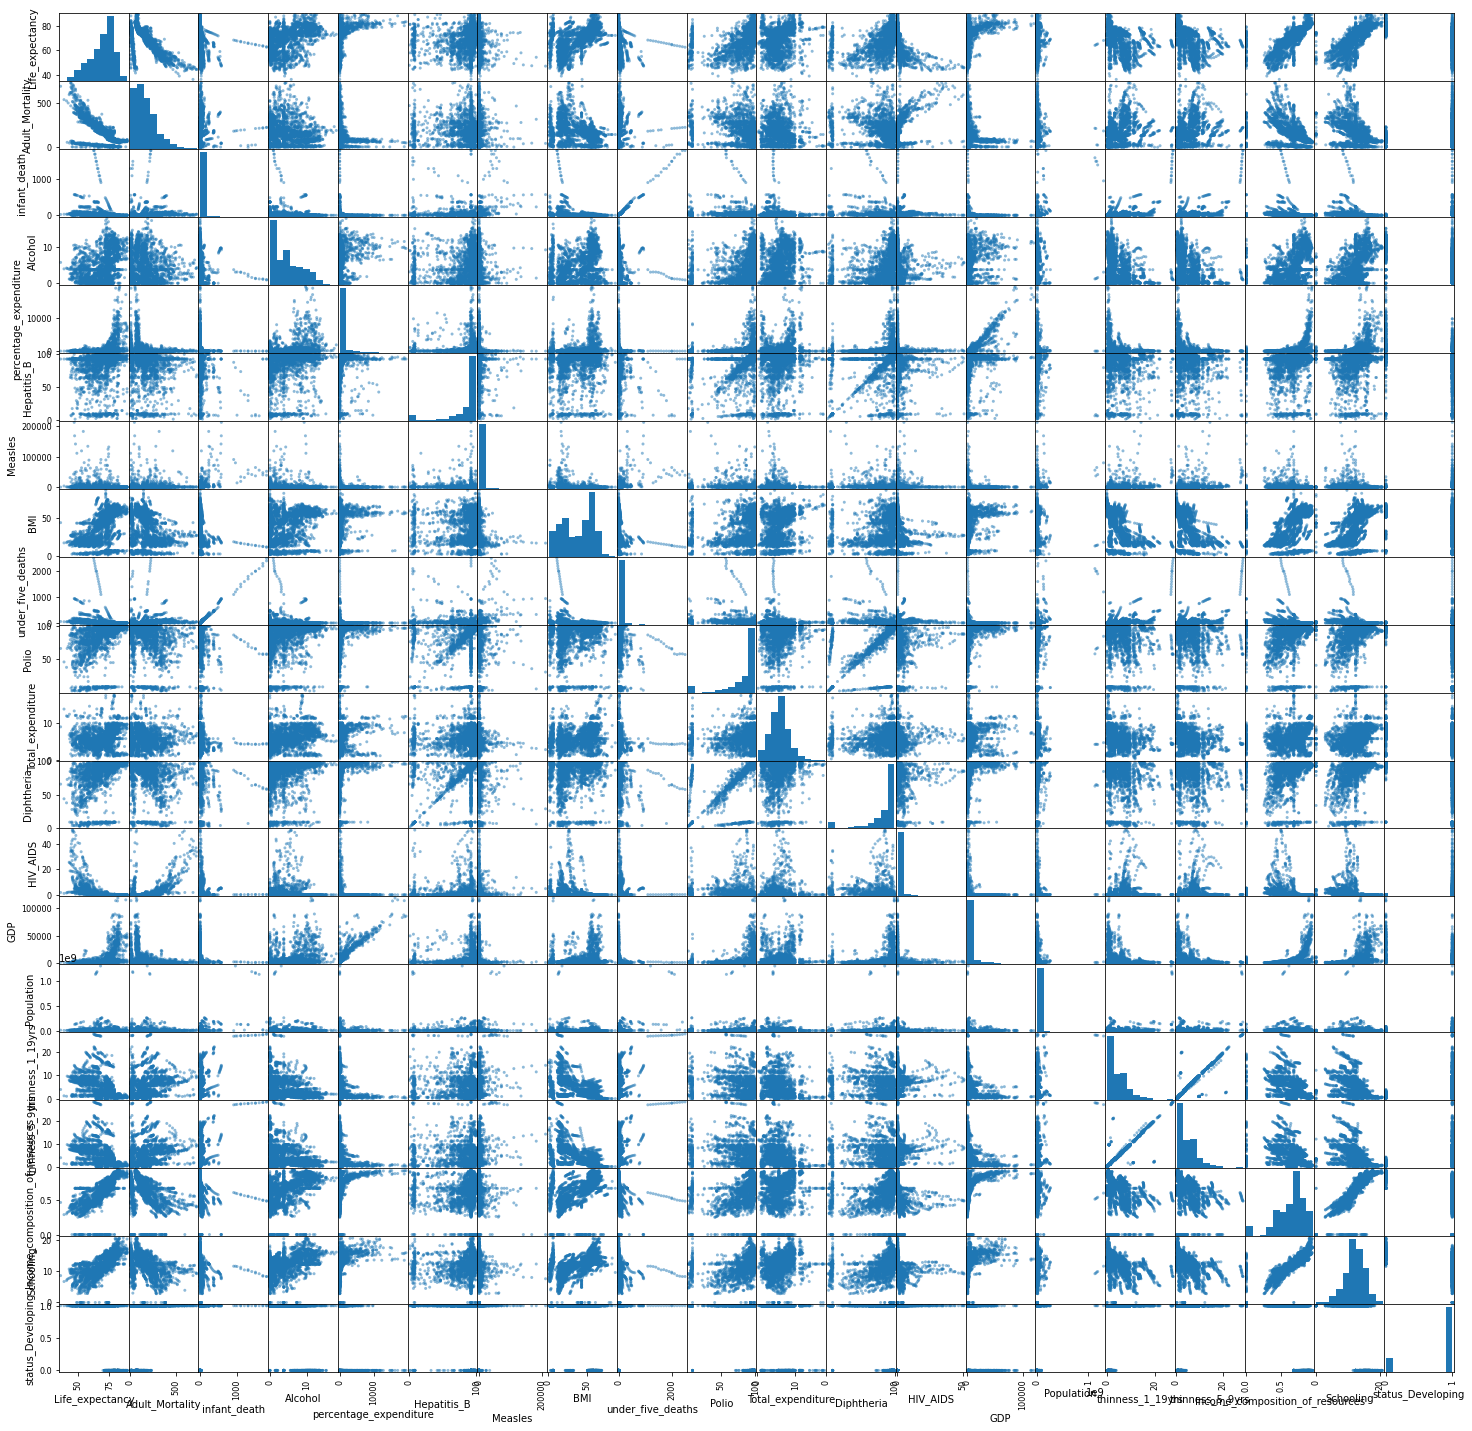

<Figure size 432x288 with 0 Axes>

In [30]:
#scatter plot
pd.plotting.scatter_matrix(df_1,figsize  = [25, 25]);
plt.show()
plt.tight_layout()

From Histogram and KDE plots we can see most of the variables has a skewed distributions, some has normal distribution. 
From scatter plots. we can see that there is positive linear relationship between life expectancy and schooling, income composition of resouces. 

**Baseline model**
- This model has no alterations to the relevant variables. 

In [31]:
#Baseline model
outcome = 'Life_expectancy'
predictors = df_1.drop('Life_expectancy', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     698.8
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:36:52   Log-Likelihood:                -8267.9
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2918   BIC:                         1.670e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          56.7284      0.672     84.444      0.000      55.411      58.046
Adult_Mortality                    -0.0199      0.001    -25.151      0.000      -0.021      -0.018
infant_death                        0.0997      0.008     11.822      0.000       0.083       0.116
Alcohol                             0.0615      0.026      2.376      0.018       0.011       0.112
percentage_expenditure           3.937e-05   9.03e-05      0.436      0.663      -0.000       0.000
Hepatitis_B                        -0.0167      0.004     -4.493      0.000      -0.024      -0.009
Measles                         -1.934e-05   7.65e-06     -2.527      0.012   -3.43e-05   -4.33e-06
BMI                                 0.0449      0.005      9.131      0.000       0.035       0.055
under_five_deaths                  -0.0747      0.006    -12.083      0.000      -0.087      -0.063
Polio                               0.0287      0.004      6.440      0.000       0.020       0.037
Total_expenditure                   0.0681      0.034      1.993      0.046       0.001       0.135
Diphtheria                          0.0410      0.005      8.834      0.000       0.032       0.050
HIV_AIDS                           -0.4698      0.018    -26.766      0.000      -0.504      -0.435
GDP                              4.246e-05   1.37e-05      3.089      0.002    1.55e-05    6.94e-05
Population                       6.001e-11   1.69e-09      0.036      0.972   -3.25e-09    3.37e-09
thinness_1_19yrs                   -0.0833      0.050     -1.655      0.098      -0.182       0.015
thinness_5_9yrs                     0.0105      0.050      0.211      0.833      -0.087       0.108
Income_composition_of_resources     5.5131      0.631      8.733      0.000       4.275       6.751
Schooling                           0.6583      0.042     15.821      0.000       0.577       0.740
status_Developing                  -1.6115      0.270     -5.970      0.000      -2.141      -1.082
==============================================================================
Omnibus:                      136.306   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.559
Skew:                          -0.189   Prob(JB):                     2.56e-85
Kurtosis:                       4.743   Cond. No.                     5.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X_0 = df_1.drop('Life_expectancy', axis=1)
y_0 = df_1['Life_expectancy']
X0_train, X0_test, y0_train, y0_test = train_test_split(X_0,y_0, random_state=141)
model_0 = LinearRegression()
model_0.fit(X0_train, y0_train)

y0_hat_train = model_0.predict(X0_train)
y0_hat_test = model_0.predict(X0_test)

from sklearn.metrics import mean_squared_error
train_mse_0 = mean_squared_error(y0_train, y0_hat_train)
test_mse_0 = mean_squared_error(y0_test, y0_hat_test)
RSME_0 = test_mse_0 - train_mse_0
print('Train Mean Squared Error:', train_mse_0)
print('Test Mean Squared Error:', test_mse_0)
print('RMSE:', RSME_0)

Train Mean Squared Error: 16.54232028845736
Test Mean Squared Error: 15.62016155773043
RMSE: -0.922158730726931


Looking at our R^2 and RSME value, our model seems to be very good that it is not underfititing or overfitting. However, we have large  mean squared errors and condition number which might indicates strong multicollinearity. We will now selecting/dropping irrelevant features. 

**Selecting significant features using stepwise selection process**

In [33]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [34]:
predictors = df_1.drop('Life_expectancy', axis=1)
result = stepwise_selection(predictors, df_1['Life_expectancy'], verbose=True)
print('resulting features:')
print(result)

Add  Adult_Mortality                with p-value 0.0
Add  Schooling                      with p-value 0.0
Add  HIV_AIDS                       with p-value 6.07143e-123
Add  Diphtheria                     with p-value 1.53491e-67
Add  BMI                            with p-value 4.80644e-41
Add  Income_composition_of_resources with p-value 4.28121e-29
Add  status_Developing              with p-value 1.7424e-21
Add  Polio                          with p-value 2.83213e-11
Add  GDP                            with p-value 1.94658e-10
Add  Hepatitis_B                    with p-value 2.1221e-07
Add  under_five_deaths              with p-value 5.30035e-08
Add  infant_death                   with p-value 1.15311e-30
Add  thinness_1_19yrs               with p-value 0.000145356
Add  Alcohol                        with p-value 0.00880015
Add  Measles                        with p-value 0.00869054
resulting features:
['Adult_Mortality', 'Schooling', 'HIV_AIDS', 'Diphtheria', 'BMI', 'Income_compositi

In [35]:
#Dropping all irrelevant columns after stepwise selection
df_prep = df_1.drop(['percentage_expenditure', 'Total_expenditure', 'Population', 'thinness_5_9yrs'], axis=1)
df_prep

Life_expectancy  Adult_Mortality  infant_death  Alcohol  Hepatitis_B  \
0                65.0            263.0            62     0.01         65.0   
1                59.9            271.0            64     0.01         62.0   
2                59.9            268.0            66     0.01         64.0   
3                59.5            272.0            69     0.01         67.0   
4                59.2            275.0            71     0.01         68.0   
...               ...              ...           ...      ...          ...   
2933             44.3            723.0            27     4.36         68.0   
2934             44.5            715.0            26     4.06          7.0   
2935             44.8             73.0            25     4.43         73.0   
2936             45.3            686.0            25     1.72         76.0   
2937             46.0            665.0            24     1.68         79.0   

      Measles   BMI  under_five_deaths  Polio  Diphtheria  HIV_AIDS  \
0        1154  19.1                 83    6.0        65.0       0.1   
1         492  18.6                 86   58.0        62.0       0.1   
2         430  18.1                 89   62.0        64.0       0.1   
3        2787  17.6                 93   67.0        67.0       0.1   
4        3013  17.2                 97   68.0        68.0       0.1   
...       ...   ...                ...    ...         ...       ...   
2933       31  27.1                 42   67.0        65.0      33.6   
2934      998  26.7                 41    7.0        68.0      36.7   
2935      304  26.3                 40   73.0        71.0      39.8   
2936      529  25.9                 39   76.0        75.0      42.1   
2937     1483  25.5                 39   78.0        78.0      43.5   

             GDP  thinness_1_19yrs  Income_composition_of_resources  \
0     584.259210              17.2                            0.479   
1     612.696514              17.5                            0.476   
2     631.744976              17.7                            0.470   
3     669.959000              17.9                            0.463   
4      63.537231              18.2                            0.454   
...          ...               ...                              ...   
2933  454.366654               9.4                            0.407   
2934  453.351155               9.8                            0.418   
2935   57.348340               1.2                            0.427   
2936  548.587312               1.6                            0.427   
2937  547.358879              11.0                            0.434   

      Schooling  status_Developing  
0          10.1                  1  
1          10.0                  1  
2           9.9                  1  
3           9.8                  1  
4           9.5                  1  
...         ...                ...  
2933        9.2                  1  
2934        9.5                  1  
2935       10.0                  1  
2936        9.8                  1  
2937        9.8                  1  

[2938 rows x 16 columns]

**Checking correlation between life expectancy and relevant features**

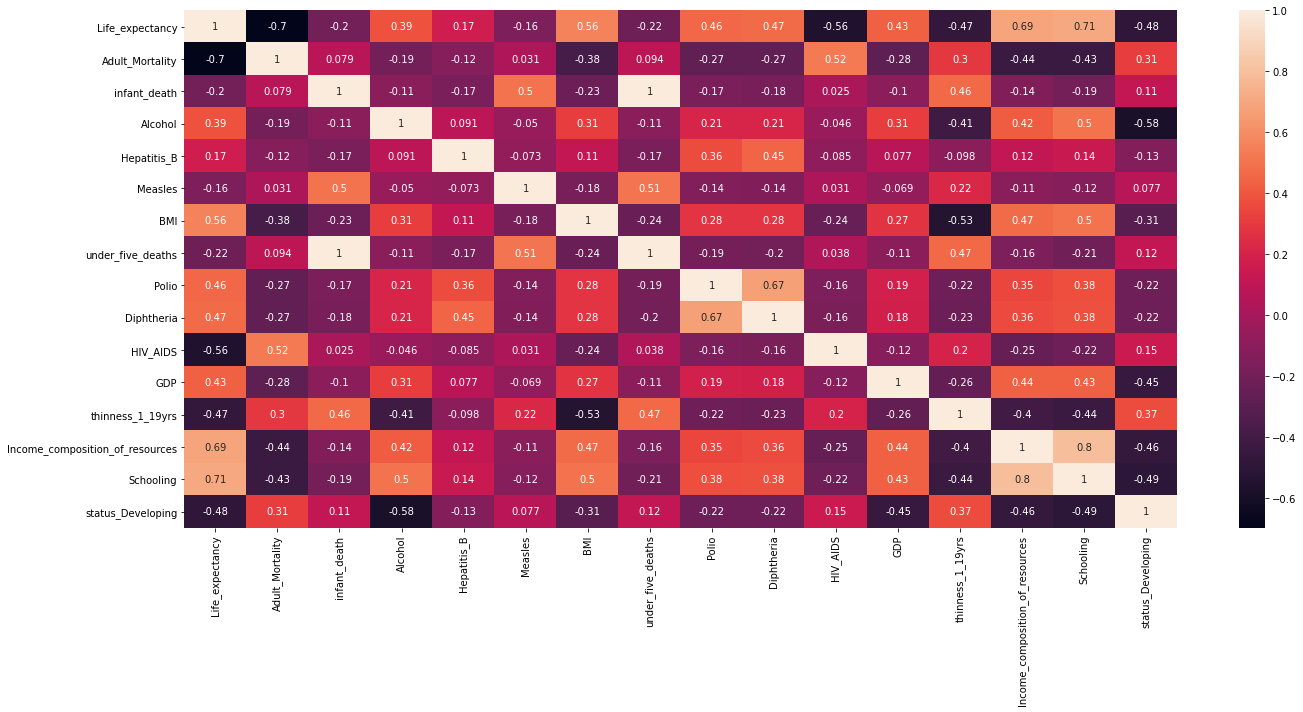

In [36]:
import seaborn as sns
df_prep.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=df_prep.corr(), annot=True)
plt.tight_layout();

In [37]:
df_corr = df_prep.corr()
df_corr

Life_expectancy  Adult_Mortality  \
Life_expectancy                         1.000000        -0.696390   
Adult_Mortality                        -0.696390         1.000000   
infant_death                           -0.196769         0.078890   
Alcohol                                 0.388918        -0.190191   
Hepatitis_B                             0.170219        -0.123287   
Measles                                -0.157767         0.031293   
BMI                                     0.556901        -0.379092   
under_five_deaths                      -0.222738         0.094280   
Polio                                   0.458399        -0.270002   
Diphtheria                              0.472211        -0.270301   
HIV_AIDS                               -0.556703         0.523886   
GDP                                     0.430461        -0.281434   
thinness_1_19yrs                       -0.468002         0.296135   
Income_composition_of_resources         0.688662        -0.436332   
Schooling                               0.713054        -0.433415   
status_Developing                      -0.481415         0.314894   

                                 infant_death   Alcohol  Hepatitis_B  \
Life_expectancy                     -0.196769  0.388918     0.170219   
Adult_Mortality                      0.078890 -0.190191    -0.123287   
infant_death                         1.000000 -0.112918    -0.167421   
Alcohol                             -0.112918  1.000000     0.090850   
Hepatitis_B                         -0.167421  0.090850     1.000000   
Measles                              0.501128 -0.049752    -0.073021   
BMI                                 -0.226796  0.313022     0.112441   
under_five_deaths                    0.996629 -0.109790    -0.170549   
Polio                               -0.170896  0.211744     0.364890   
Diphtheria                          -0.175376  0.212388     0.449151   
HIV_AIDS                             0.025231 -0.046235    -0.085497   
GDP                                 -0.102829  0.313060     0.076660   
thinness_1_19yrs                     0.464811 -0.413021    -0.097576   
Income_composition_of_resources     -0.141571  0.418372     0.117652   
Schooling                           -0.190951  0.498899     0.141275   
status_Developing                    0.112252 -0.579662    -0.127008   

                                  Measles       BMI  under_five_deaths  \
Life_expectancy                 -0.157767  0.556901          -0.222738   
Adult_Mortality                  0.031293 -0.379092           0.094280   
infant_death                     0.501128 -0.226796           0.996629   
Alcohol                         -0.049752  0.313022          -0.109790   
Hepatitis_B                     -0.073021  0.112441          -0.170549   
Measles                          1.000000 -0.176069           0.507809   
BMI                             -0.176069  1.000000          -0.237048   
under_five_deaths                0.507809 -0.237048           1.000000   
Polio                           -0.136669  0.281260          -0.188864   
Diphtheria                      -0.142385  0.280267          -0.195808   
HIV_AIDS                         0.030899 -0.243383           0.038062   
GDP                             -0.069253  0.273932          -0.106093   
thinness_1_19yrs                 0.224870 -0.532487           0.466697   
Income_composition_of_resources -0.111089  0.471947          -0.159264   
Schooling                       -0.120799  0.499806          -0.206242   
status_Developing                0.076955 -0.309371           0.115195   

                                    Polio  Diphtheria  HIV_AIDS       GDP  \
Life_expectancy                  0.458399    0.472211 -0.556703  0.430461   
Adult_Mortality                 -0.270002   -0.270301  0.523886 -0.281434   
infant_death                    -0.170896   -0.175376  0.025231 -0.102829   
Alcohol                          0.211744    0.212388 -0.046235  0.

In [38]:
df_corr['Life_expectancy'].sort_values()

Adult_Mortality                   -0.696390
HIV_AIDS                          -0.556703
status_Developing                 -0.481415
thinness_1_19yrs                  -0.468002
under_five_deaths                 -0.222738
infant_death                      -0.196769
Measles                           -0.157767
Hepatitis_B                        0.170219
Alcohol                            0.388918
GDP                                0.430461
Polio                              0.458399
Diphtheria                         0.472211
BMI                                0.556901
Income_composition_of_resources    0.688662
Schooling                          0.713054
Life_expectancy                    1.000000
Name: Life_expectancy, dtype: float64

In [39]:
df_corr.loc[(df_corr['Life_expectancy'] >= 0.40) | (df_corr['Life_expectancy'] <= -0.40)]

Life_expectancy  Adult_Mortality  \
Life_expectancy                         1.000000        -0.696390   
Adult_Mortality                        -0.696390         1.000000   
BMI                                     0.556901        -0.379092   
Polio                                   0.458399        -0.270002   
Diphtheria                              0.472211        -0.270301   
HIV_AIDS                               -0.556703         0.523886   
GDP                                     0.430461        -0.281434   
thinness_1_19yrs                       -0.468002         0.296135   
Income_composition_of_resources         0.688662        -0.436332   
Schooling                               0.713054        -0.433415   
status_Developing                      -0.481415         0.314894   

                                 infant_death   Alcohol  Hepatitis_B  \
Life_expectancy                     -0.196769  0.388918     0.170219   
Adult_Mortality                      0.078890 -0.190191    -0.123287   
BMI                                 -0.226796  0.313022     0.112441   
Polio                               -0.170896  0.211744     0.364890   
Diphtheria                          -0.175376  0.212388     0.449151   
HIV_AIDS                             0.025231 -0.046235    -0.085497   
GDP                                 -0.102829  0.313060     0.076660   
thinness_1_19yrs                     0.464811 -0.413021    -0.097576   
Income_composition_of_resources     -0.141571  0.418372     0.117652   
Schooling                           -0.190951  0.498899     0.141275   
status_Developing                    0.112252 -0.579662    -0.127008   

                                  Measles       BMI  under_five_deaths  \
Life_expectancy                 -0.157767  0.556901          -0.222738   
Adult_Mortality                  0.031293 -0.379092           0.094280   
BMI                             -0.176069  1.000000          -0.237048   
Polio                           -0.136669  0.281260          -0.188864   
Diphtheria                      -0.142385  0.280267          -0.195808   
HIV_AIDS                         0.030899 -0.243383           0.038062   
GDP                             -0.069253  0.273932          -0.106093   
thinness_1_19yrs                 0.224870 -0.532487           0.466697   
Income_composition_of_resources -0.111089  0.471947          -0.159264   
Schooling                       -0.120799  0.499806          -0.206242   
status_Developing                0.076955 -0.309371           0.115195   

                                    Polio  Diphtheria  HIV_AIDS       GDP  \
Life_expectancy                  0.458399    0.472211 -0.556703  0.430461   
Adult_Mortality                 -0.270002   -0.270301  0.523886 -0.281434   
BMI                              0.281260    0.280267 -0.243383  0.273932   
Polio                            1.000000    0.673977 -0.159128  0.189926   
Diphtheria                       0.673977    1.000000 -0.164419  0.181953   
HIV_AIDS                        -0.159128   -0.164419  1.000000 -0.122590   
GDP                              0.189926    0.181953 -0.122590  1.000000   
thinness_1_19yrs                -0.218401   -0.226409  0.203684 -0.263323   
Income_composition_of_resources  0.345172    0.359379 -0.247823  0.435960   
Schooling                        0.375830    0.379062 -0.218822  0.432229   
status_Developing               -0.218628   -0.215281  0.148590 -0.445981   

                                 thinness_1_19yrs  \
Life_expectancy                         -0.468002   
Adult_Mortality                          0.296135   
BMI                                     -0.532487   
Polio                                   -0.218401   
Diphtheria                              -0.226409   
HIV_AIDS                                 0.203684   
GDP                                     -0.263323   
thinness_1_19yrs                         1.000000   
Income_composition_of_resources         -0.40143

Features with good correlation with life expectancy are : GDP, Polio, thinness_1_19ys, status_developing, HIV_AIDS, BMI, Schooling, Adult_Mortality, Income_composition_of_resources, Diphtheria

In [40]:
#Dropping all columns with low correlations 
df_good_ft = df_prep.drop(['infant_death', 'Alcohol', 'Hepatitis_B', 'Measles', 'under_five_deaths'], axis=1)
df_good_ft

Life_expectancy  Adult_Mortality   BMI  Polio  Diphtheria  HIV_AIDS  \
0                65.0            263.0  19.1    6.0        65.0       0.1   
1                59.9            271.0  18.6   58.0        62.0       0.1   
2                59.9            268.0  18.1   62.0        64.0       0.1   
3                59.5            272.0  17.6   67.0        67.0       0.1   
4                59.2            275.0  17.2   68.0        68.0       0.1   
...               ...              ...   ...    ...         ...       ...   
2933             44.3            723.0  27.1   67.0        65.0      33.6   
2934             44.5            715.0  26.7    7.0        68.0      36.7   
2935             44.8             73.0  26.3   73.0        71.0      39.8   
2936             45.3            686.0  25.9   76.0        75.0      42.1   
2937             46.0            665.0  25.5   78.0        78.0      43.5   

             GDP  thinness_1_19yrs  Income_composition_of_resources  \
0     584.259210              17.2                            0.479   
1     612.696514              17.5                            0.476   
2     631.744976              17.7                            0.470   
3     669.959000              17.9                            0.463   
4      63.537231              18.2                            0.454   
...          ...               ...                              ...   
2933  454.366654               9.4                            0.407   
2934  453.351155               9.8                            0.418   
2935   57.348340               1.2                            0.427   
2936  548.587312               1.6                            0.427   
2937  547.358879              11.0                            0.434   

      Schooling  status_Developing  
0          10.1                  1  
1          10.0                  1  
2           9.9                  1  
3           9.8                  1  
4           9.5                  1  
...         ...                ...  
2933        9.2                  1  
2934        9.5                  1  
2935       10.0                  1  
2936        9.8                  1  
2937        9.8                  1  

[2938 rows x 11 columns]

**Checking for multicollinearity**

In [41]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

good_corr_df = df_good_ft.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
good_corr_df['pairs'] = list(zip(good_corr_df.level_0, good_corr_df.level_1))

# set index to pairs
good_corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
good_corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
good_corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
good_corr_df.drop_duplicates(inplace=True)
good_corr_df[(good_corr_df.cc>0.75) & (good_corr_df.cc < 1)]

cc
pairs                                                 
(Schooling, Income_composition_of_resources)  0.795383

In [42]:
#removing Income_composition_of_resources to remove multicollinearity
non_colin_df = df_good_ft.drop(['Income_composition_of_resources'], axis=1)
non_colin_df

Life_expectancy  Adult_Mortality   BMI  Polio  Diphtheria  HIV_AIDS  \
0                65.0            263.0  19.1    6.0        65.0       0.1   
1                59.9            271.0  18.6   58.0        62.0       0.1   
2                59.9            268.0  18.1   62.0        64.0       0.1   
3                59.5            272.0  17.6   67.0        67.0       0.1   
4                59.2            275.0  17.2   68.0        68.0       0.1   
...               ...              ...   ...    ...         ...       ...   
2933             44.3            723.0  27.1   67.0        65.0      33.6   
2934             44.5            715.0  26.7    7.0        68.0      36.7   
2935             44.8             73.0  26.3   73.0        71.0      39.8   
2936             45.3            686.0  25.9   76.0        75.0      42.1   
2937             46.0            665.0  25.5   78.0        78.0      43.5   

             GDP  thinness_1_19yrs  Schooling  status_Developing  
0     584.259210              17.2       10.1                  1  
1     612.696514              17.5       10.0                  1  
2     631.744976              17.7        9.9                  1  
3     669.959000              17.9        9.8                  1  
4      63.537231              18.2        9.5                  1  
...          ...               ...        ...                ...  
2933  454.366654               9.4        9.2                  1  
2934  453.351155               9.8        9.5                  1  
2935   57.348340               1.2       10.0                  1  
2936  548.587312               1.6        9.8                  1  
2937  547.358879              11.0        9.8                  1  

[2938 rows x 10 columns]

**Model 1**
- This model is built with 9 features after multicollinearity removed.

In [43]:
outcome = 'Life_expectancy'
predictors = non_colin_df.drop('Life_expectancy', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_1 = ols(formula=formula, data=non_colin_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1309.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:06   Log-Likelihood:                -8414.3
No. Observations:                2938   AIC:                         1.685e+04
Df Residuals:                    2928   BIC:                         1.691e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            55.5247      0.606     91.593      0.000      54.336      56.713
Adult_Mortality      -0.0208      0.001    -25.236      0.000      -0.022      -0.019
BMI                   0.0515      0.005     10.184      0.000       0.042       0.061
Polio                 0.0308      0.005      6.649      0.000       0.022       0.040
Diphtheria            0.0450      0.005      9.836      0.000       0.036       0.054
HIV_AIDS             -0.4814      0.018    -26.437      0.000      -0.517      -0.446
GDP                5.149e-05   6.88e-06      7.485      0.000     3.8e-05     6.5e-05
thinness_1_19yrs     -0.1026      0.022     -4.655      0.000      -0.146      -0.059
Schooling             0.9503      0.033     28.583      0.000       0.885       1.015
status_Developing    -1.8396      0.254     -7.256      0.000      -2.337      -1.342
==============================================================================
Omnibus:                      140.426   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.639
Skew:                          -0.269   Prob(JB):                     6.52e-75
Kurtosis:                       4.581   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X_1 = non_colin_df.drop('Life_expectancy', axis=1)
y_1 = non_colin_df['Life_expectancy']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1, random_state=3)
model_1k = LinearRegression()
model_1k.fit(X1_train, y1_train)

y1_hat_train = model_1k.predict(X1_train)
y1_hat_test = model_1k.predict(X1_test)

from sklearn.metrics import mean_squared_error
train_mse_1 = mean_squared_error(y1_train, y1_hat_train)
test_mse_1 = mean_squared_error(y1_test, y1_hat_test)
RSME_1 = test_mse_1 - train_mse_1
print('Train Mean Squared Error:', train_mse_1)
print('Test Mean Squared Error:', test_mse_1)
print('RMSE:', RSME_1)

Train Mean Squared Error: 18.062978166949495
Test Mean Squared Error: 17.88084478384303
RMSE: -0.1821333831064642


From our summary and residual error, our adjusted R^2 is good showing that linear regression has a good fit however we  still have high Jarque_Bera value suggesting non-normality in our variables and high condition number still suggesting other numerical problem since we have removed multicollinearity. 

**Visualize the error term for variance and heteroscedasticity**

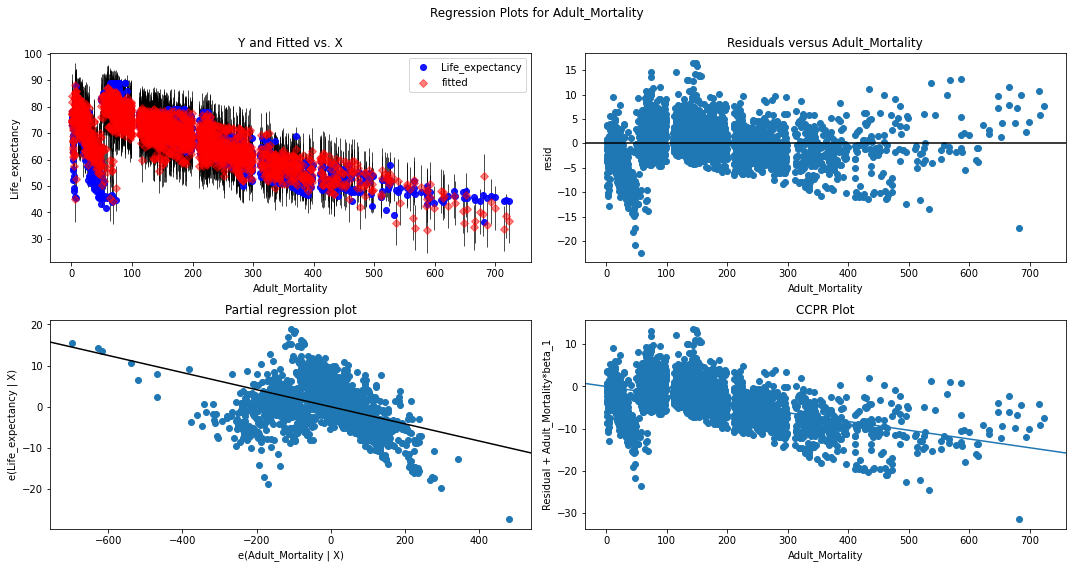

<Figure size 432x288 with 0 Axes>

In [45]:
#Adult Mortality 
fig_1 = plt.figure(figsize=(15,8))
fig_1 = sm.graphics.plot_regress_exog( model_1,'Adult_Mortality',fig=fig_1)
plt.show()
plt.tight_layout();

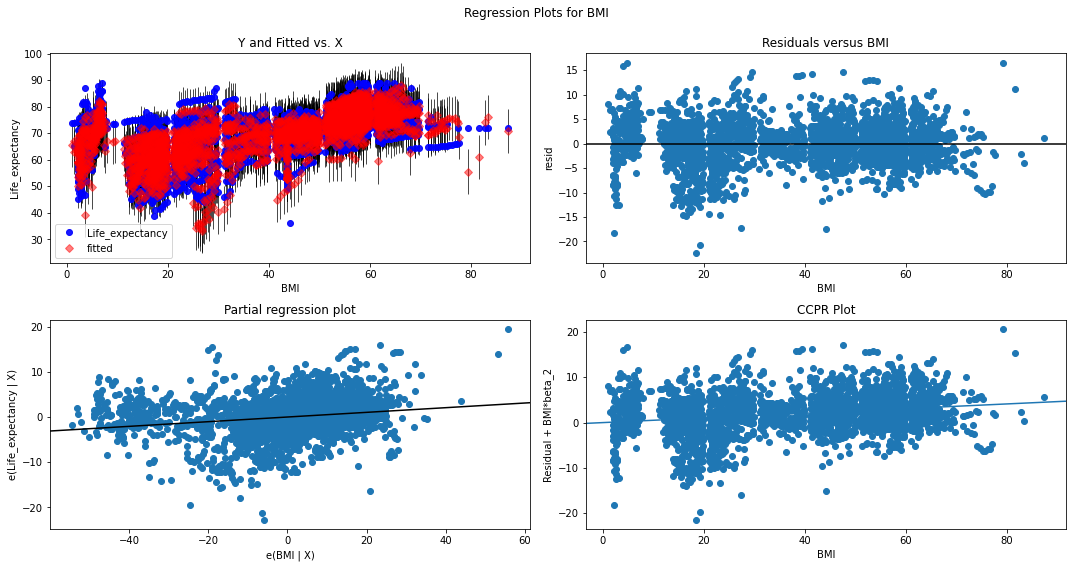

<Figure size 432x288 with 0 Axes>

In [46]:
#BMI
fig_2 = plt.figure(figsize=(15,8))
fig_2 = sm.graphics.plot_regress_exog( model_1,'BMI',fig=fig_2)
plt.show()
plt.tight_layout();

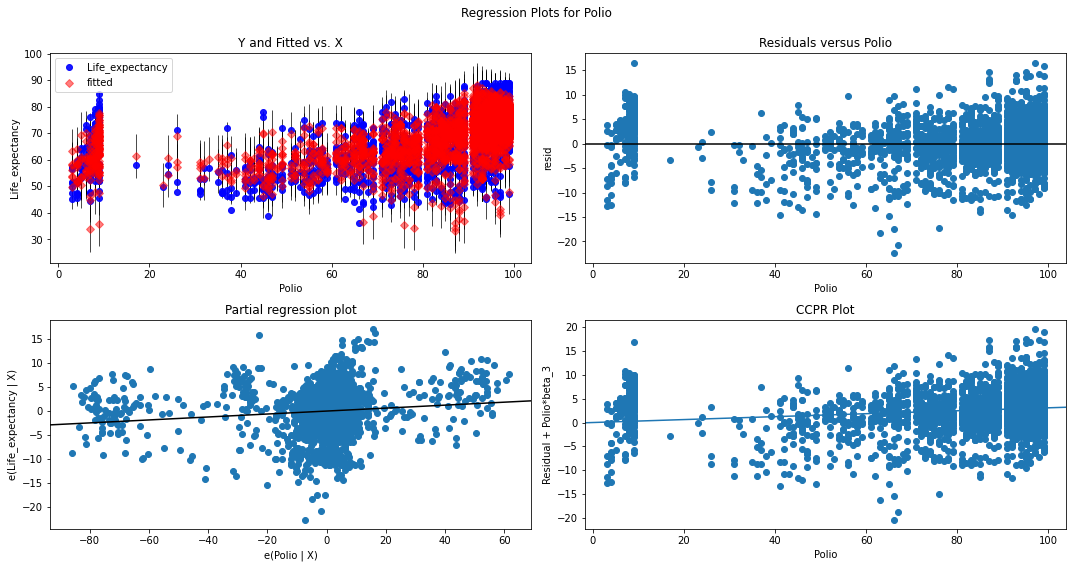

<Figure size 432x288 with 0 Axes>

In [47]:
#Polio
fig_3 = plt.figure(figsize=(15,8))
fig_3 = sm.graphics.plot_regress_exog( model_1,'Polio',fig=fig_3)
plt.show()
plt.tight_layout();

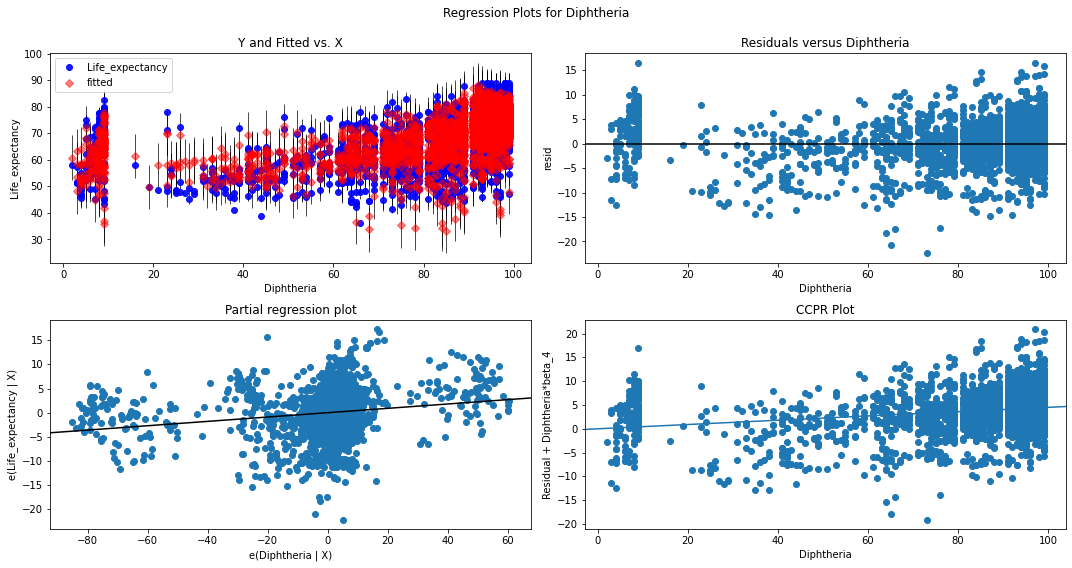

<Figure size 432x288 with 0 Axes>

In [48]:
#Diphtheria
fig_4 = plt.figure(figsize=(15,8))
fig_4 = sm.graphics.plot_regress_exog( model_1,'Diphtheria',fig=fig_4)
plt.show()
plt.tight_layout();

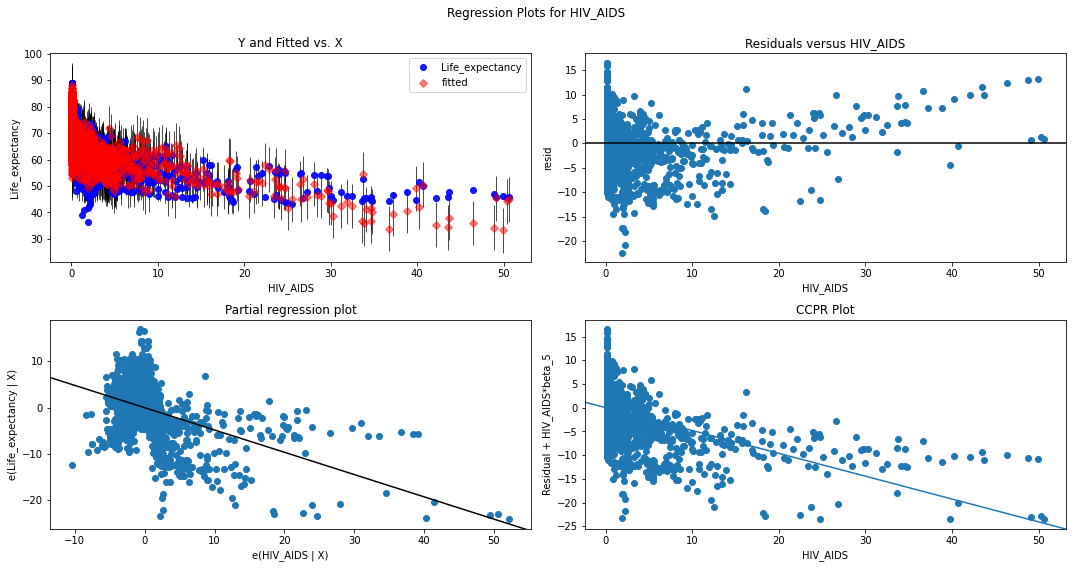

<Figure size 432x288 with 0 Axes>

In [49]:
#HIV_AIDS
fig_5 = plt.figure(figsize=(15,8))
fig_5 = sm.graphics.plot_regress_exog( model_1,'HIV_AIDS',fig=fig_5)
plt.show()
plt.tight_layout();

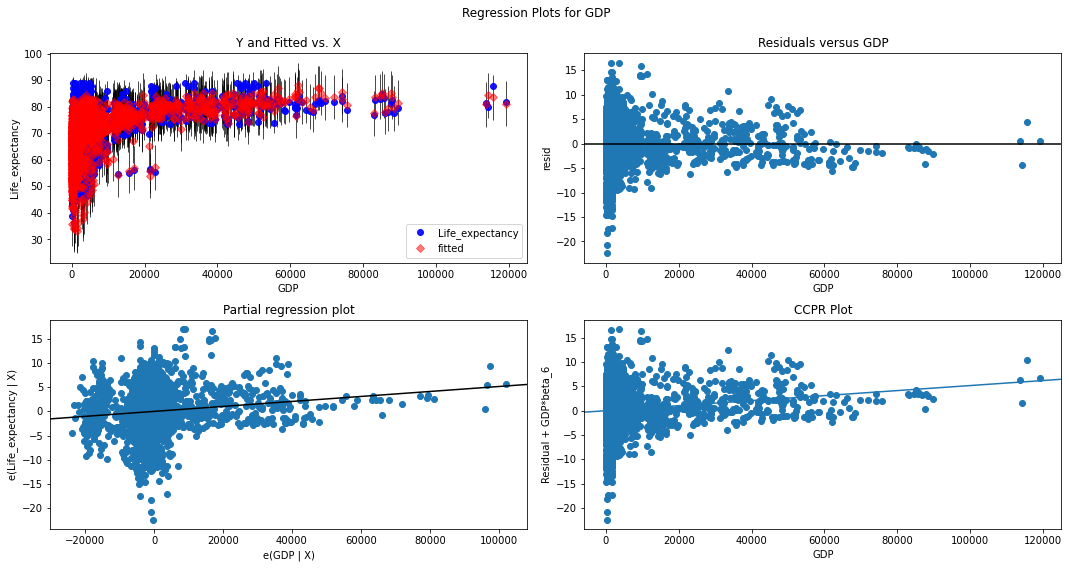

<Figure size 432x288 with 0 Axes>

In [50]:
#GDP
fig_6 = plt.figure(figsize=(15,8))
fig_6 = sm.graphics.plot_regress_exog( model_1,'GDP',fig=fig_6)
plt.show()
plt.tight_layout();

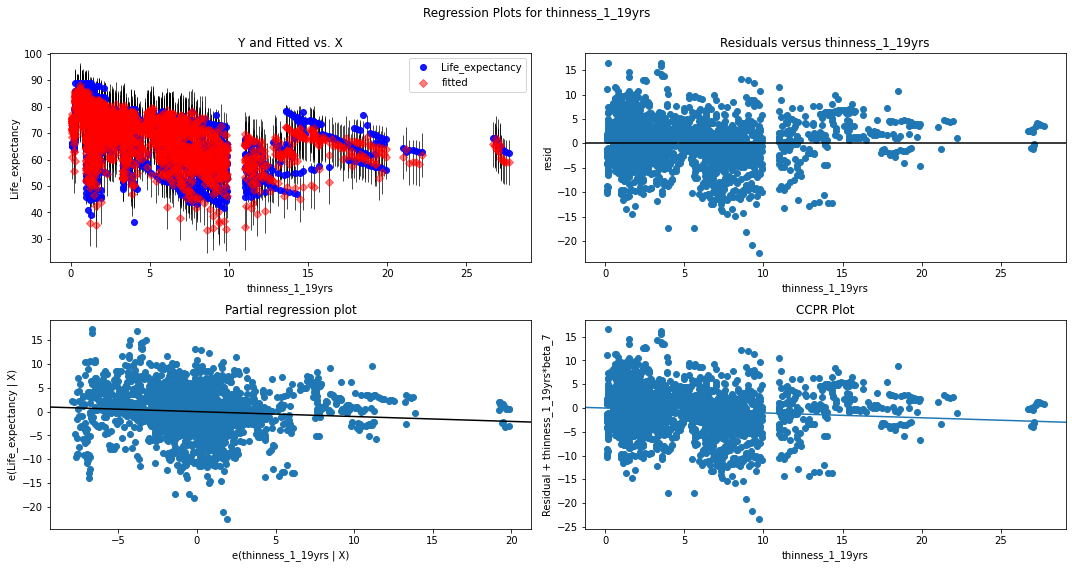

<Figure size 432x288 with 0 Axes>

In [51]:
#thinness_1_19yrs
fig_7 = plt.figure(figsize=(15,8))
fig_7 = sm.graphics.plot_regress_exog( model_1,'thinness_1_19yrs',fig=fig_7)
plt.show()
plt.tight_layout();

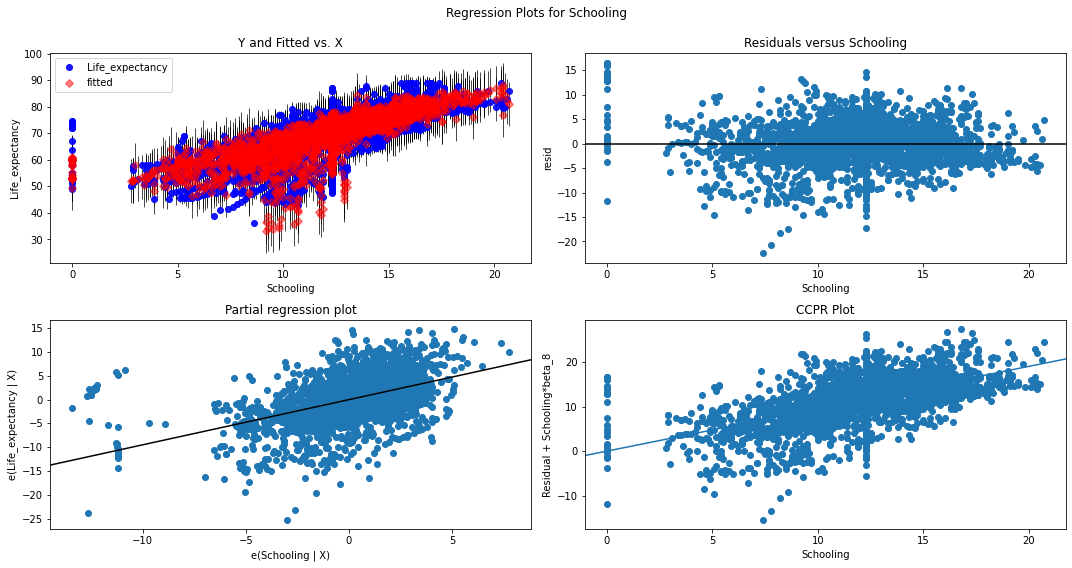

<Figure size 432x288 with 0 Axes>

In [52]:
#Schooling
fig_8 = plt.figure(figsize=(15,8))
fig_8 = sm.graphics.plot_regress_exog( model_1,'Schooling',fig=fig_8)
plt.show()
plt.tight_layout();

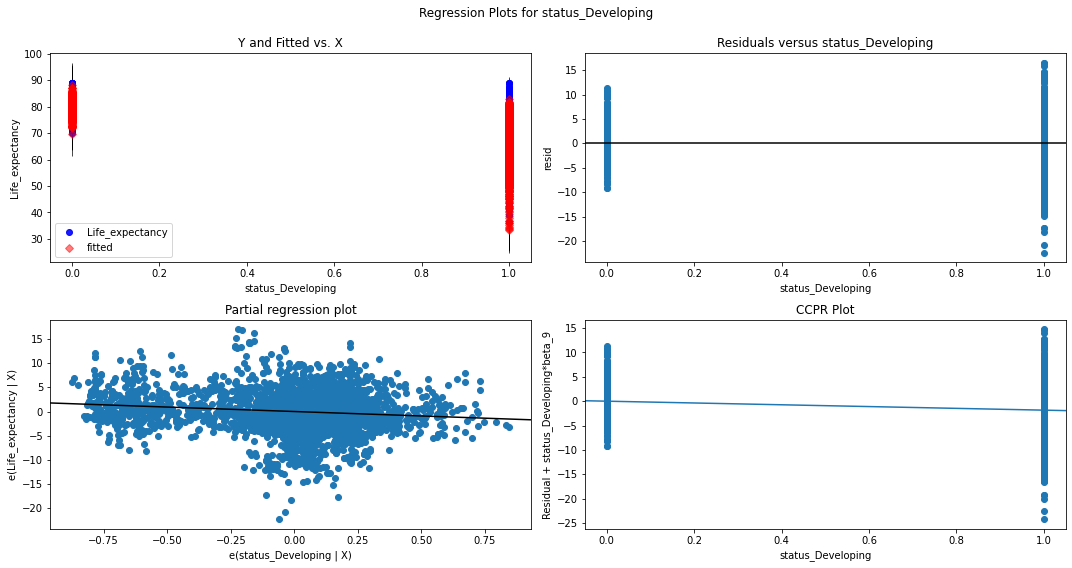

<Figure size 432x288 with 0 Axes>

In [53]:
#status_Developing
fig_9 = plt.figure(figsize=(15,8))
fig_9 = sm.graphics.plot_regress_exog( model_1,'status_Developing',fig=fig_9)
plt.show()
plt.tight_layout();

From residual maps of each feature we can see that all feature does not satisfy the homocedascity assumption.

**QQ plot to check for normality**

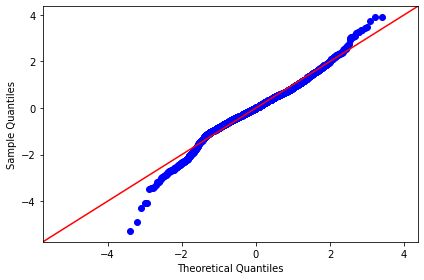

In [54]:
resid = model_1.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout();

From our residual plots of model 1, we can see a cone shape in our resisual plots and QQ plot showing non-linearity suggesting non normal distributions. From here we can transform our features to make them more normally distributed.

**Log Transformation**

In [55]:
non_colin_df.columns

Index(['Life_expectancy', 'Adult_Mortality', 'BMI', 'Polio', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness_1_19yrs', 'Schooling',
       'status_Developing'],
      dtype='object')

In [56]:
non_colin_df

Life_expectancy  Adult_Mortality   BMI  Polio  Diphtheria  HIV_AIDS  \
0                65.0            263.0  19.1    6.0        65.0       0.1   
1                59.9            271.0  18.6   58.0        62.0       0.1   
2                59.9            268.0  18.1   62.0        64.0       0.1   
3                59.5            272.0  17.6   67.0        67.0       0.1   
4                59.2            275.0  17.2   68.0        68.0       0.1   
...               ...              ...   ...    ...         ...       ...   
2933             44.3            723.0  27.1   67.0        65.0      33.6   
2934             44.5            715.0  26.7    7.0        68.0      36.7   
2935             44.8             73.0  26.3   73.0        71.0      39.8   
2936             45.3            686.0  25.9   76.0        75.0      42.1   
2937             46.0            665.0  25.5   78.0        78.0      43.5   

             GDP  thinness_1_19yrs  Schooling  status_Developing  
0     584.259210              17.2       10.1                  1  
1     612.696514              17.5       10.0                  1  
2     631.744976              17.7        9.9                  1  
3     669.959000              17.9        9.8                  1  
4      63.537231              18.2        9.5                  1  
...          ...               ...        ...                ...  
2933  454.366654               9.4        9.2                  1  
2934  453.351155               9.8        9.5                  1  
2935   57.348340               1.2       10.0                  1  
2936  548.587312               1.6        9.8                  1  
2937  547.358879              11.0        9.8                  1  

[2938 rows x 10 columns]

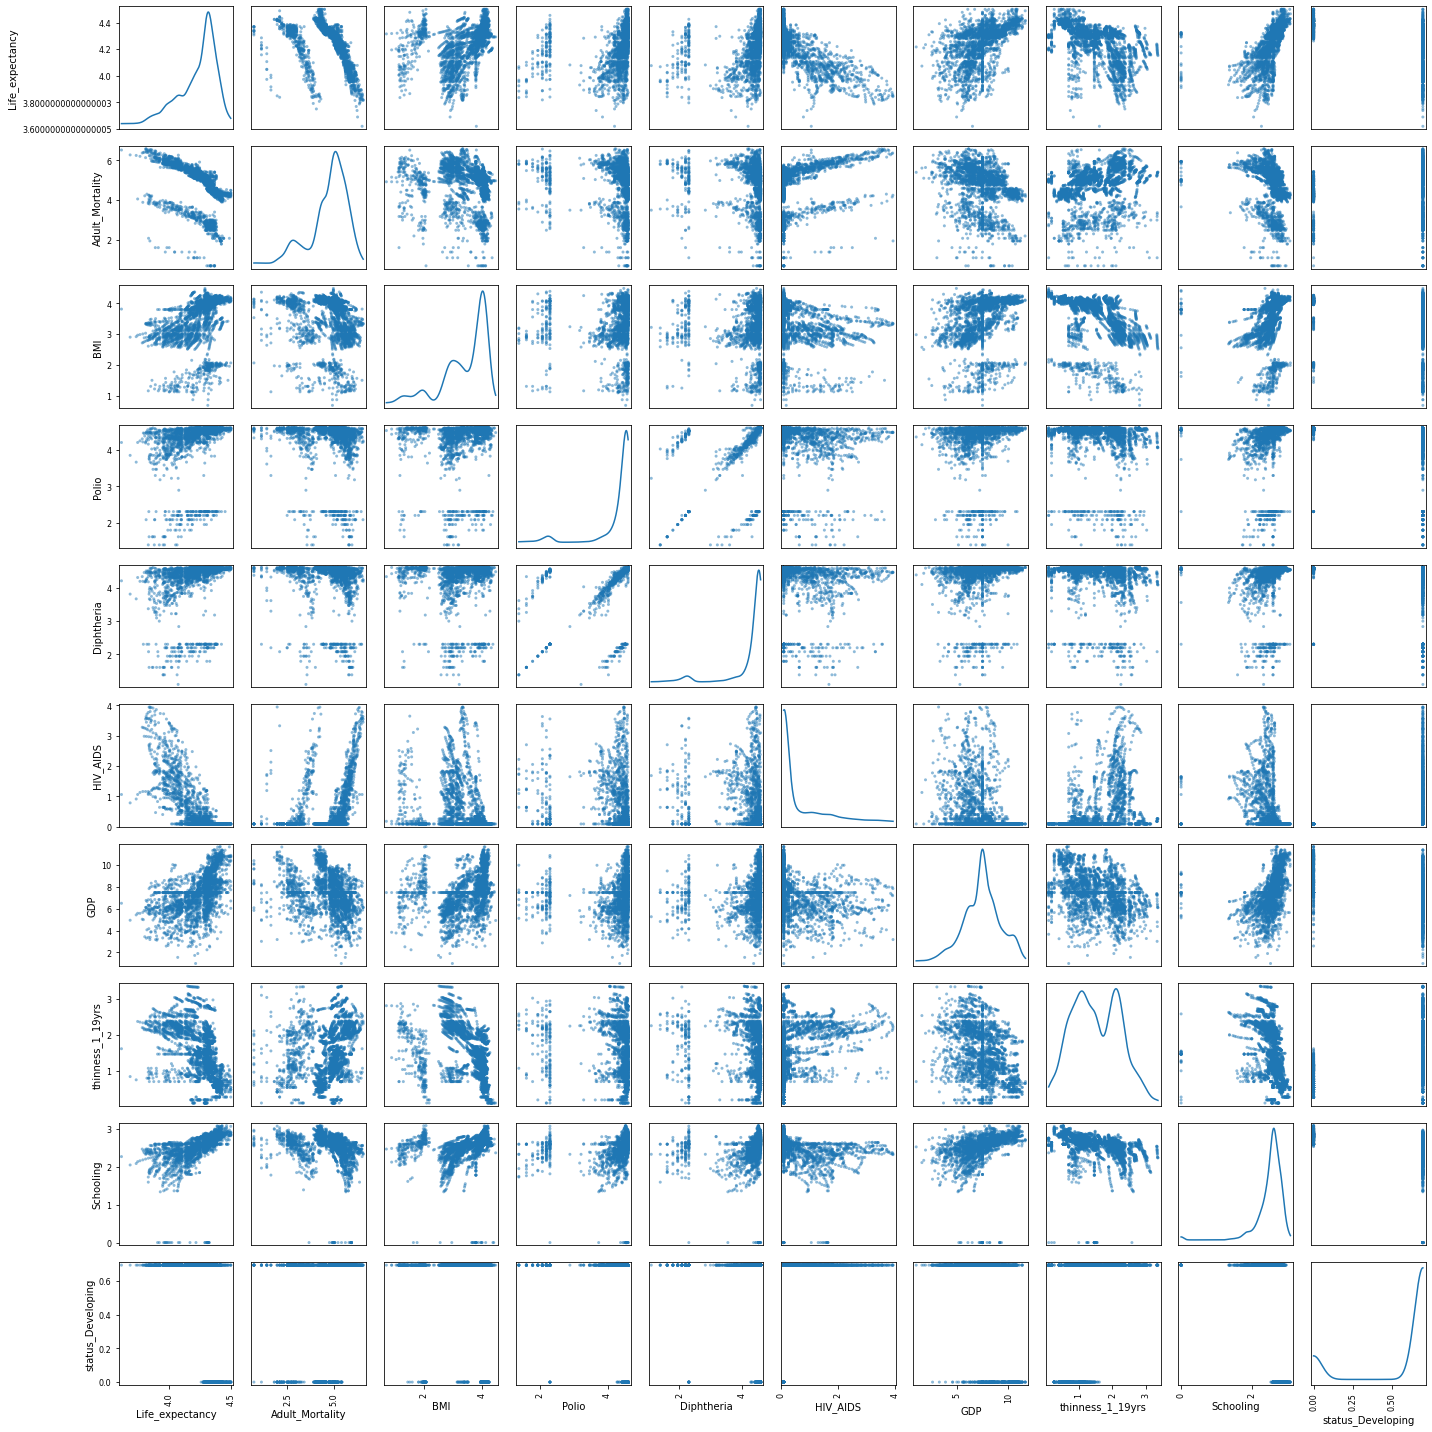

In [57]:
non_normal = ['Life_expectancy', 'Adult_Mortality', 'BMI', 'Polio', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'thinness_1_19yrs', 'Schooling', 'status_Developing']
for feat in non_normal:
    non_colin_df[feat] = non_colin_df[feat].map(lambda x: np.log(x+1))
pd.plotting.scatter_matrix(non_colin_df[non_normal], figsize=(20,20), diagonal = 'kde')
plt.tight_layout();

**Model 2**
- This model is built with features undergone log transformation 

In [58]:
outcome = 'Life_expectancy'
predictors = non_colin_df.drop('Life_expectancy', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_2 = ols(formula=formula, data=non_colin_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1344.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:47   Log-Likelihood:                 3916.0
No. Observations:                2938   AIC:                            -7812.
Df Residuals:                    2928   BIC:                            -7752.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.9673      0.017    227.145      0.000       3.933       4.002
Adult_Mortality      -0.0127      0.001    -10.070      0.000      -0.015      -0.010
BMI                   0.0096      0.002      5.320      0.000       0.006       0.013
Polio                 0.0147      0.002      6.230      0.000       0.010       0.019
Diphtheria            0.0172      0.002      7.335      0.000       0.013       0.022
HIV_AIDS             -0.1021      0.002    -56.204      0.000      -0.106      -0.099
GDP                   0.0125      0.001     15.088      0.000       0.011       0.014
thinness_1_19yrs     -0.0209      0.002     -9.956      0.000      -0.025      -0.017
Schooling             0.0721      0.004     18.773      0.000       0.065       0.080
status_Developing    -0.0476      0.005     -8.824      0.000      -0.058      -0.037
==============================================================================
Omnibus:                      469.690   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2213.671
Skew:                          -0.690   Prob(JB):                         0.00
Kurtosis:                       7.022   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_2 = non_colin_df.drop('Life_expectancy', axis=1)
y_2 = non_colin_df['Life_expectancy']
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2,y_2, random_state=3)
model_2k = LinearRegression()
model_2k.fit(X2_train, y2_train)

y2_hat_train = model_2k.predict(X2_train)
y2_hat_test = model_2k.predict(X2_test)

from sklearn.metrics import mean_squared_error
train_mse_2 = mean_squared_error(y2_train, y2_hat_train)
test_mse_2 = mean_squared_error(y2_test, y2_hat_test)
RSME_2 = test_mse_2 - train_mse_2
print('Train Mean Squared Error:', train_mse_2)
print('Test Mean Squared Error:', test_mse_2)
print('RMSE:', RSME_2)

Train Mean Squared Error: 0.004073368819343894
Test Mean Squared Error: 0.004087479729275892
RMSE: 1.4110909931998143e-05


**Visualize the error term for variance and heteroscedasticity**

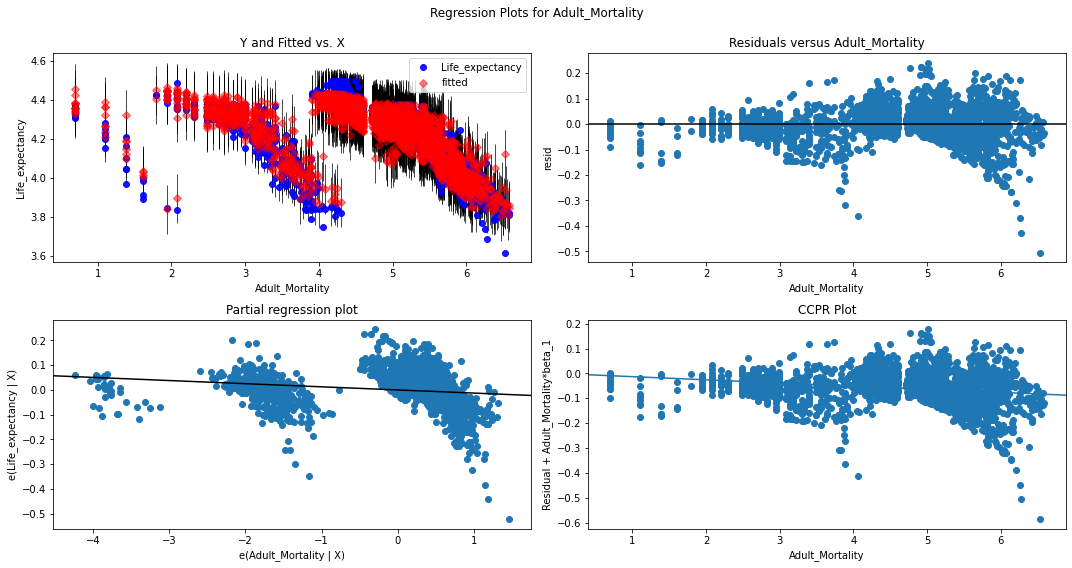

<Figure size 432x288 with 0 Axes>

In [60]:
#Adult Mortality 
fig_10 = plt.figure(figsize=(15,8))
fig_10 = sm.graphics.plot_regress_exog( model_2,'Adult_Mortality',fig=fig_10)
plt.show()
plt.tight_layout();

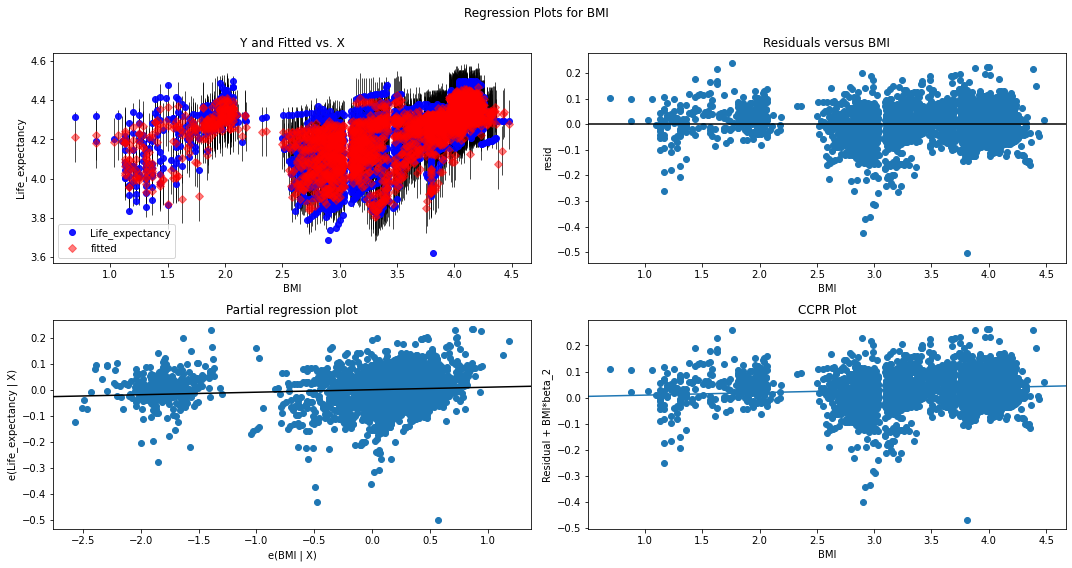

<Figure size 432x288 with 0 Axes>

In [61]:
#BMI
fig_11 = plt.figure(figsize=(15,8))
fig_11 = sm.graphics.plot_regress_exog( model_2,'BMI',fig=fig_11)
plt.show()
plt.tight_layout();

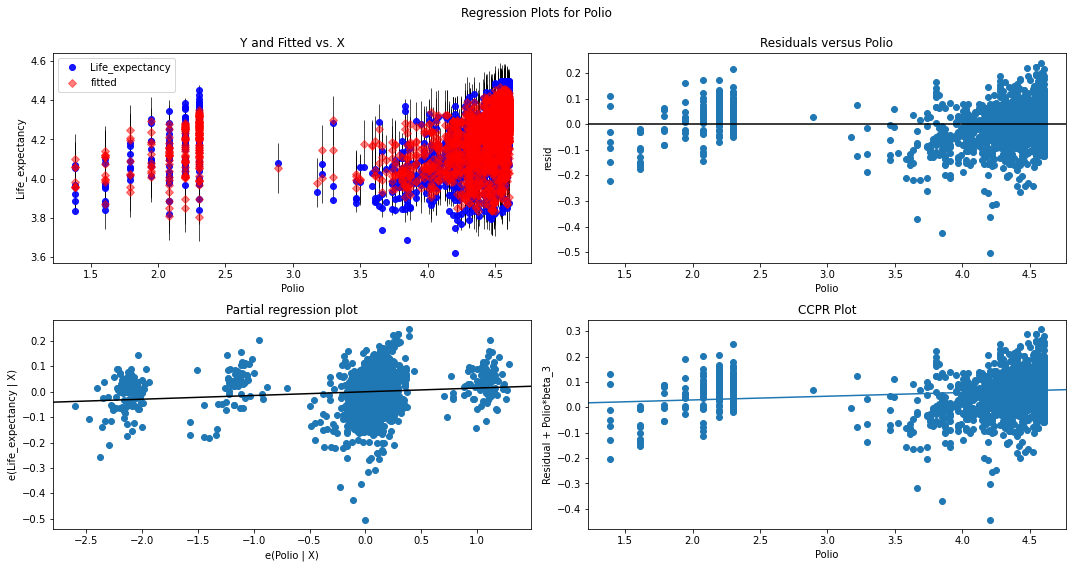

<Figure size 432x288 with 0 Axes>

In [62]:
#Polio
fig_12 = plt.figure(figsize=(15,8))
fig_12 = sm.graphics.plot_regress_exog( model_2,'Polio',fig=fig_12)
plt.show()
plt.tight_layout();

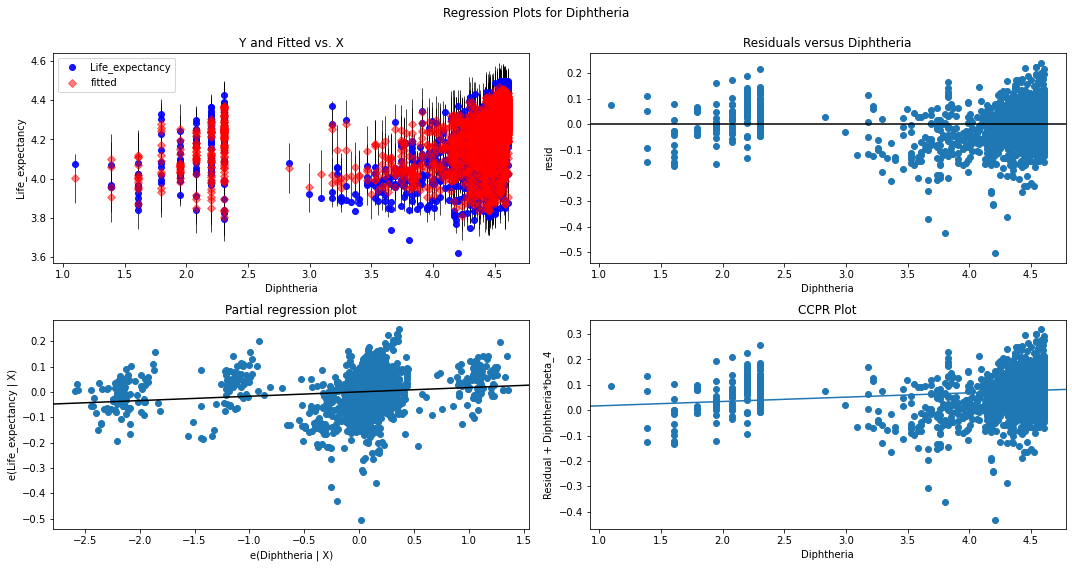

<Figure size 432x288 with 0 Axes>

In [63]:
#Diphtheria
fig_13 = plt.figure(figsize=(15,8))
fig_13 = sm.graphics.plot_regress_exog( model_2,'Diphtheria',fig=fig_13)
plt.show()
plt.tight_layout();

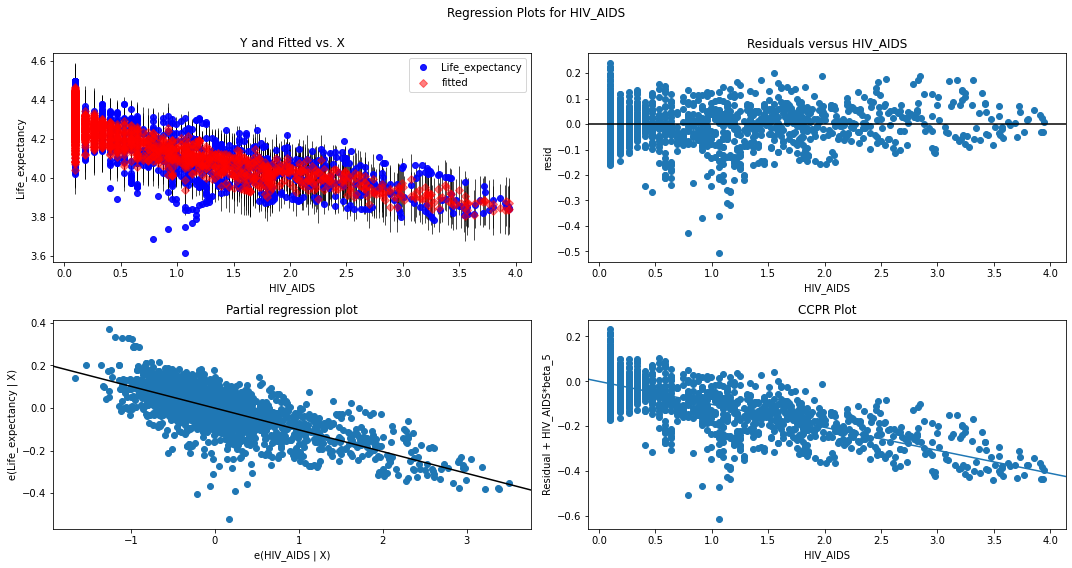

<Figure size 432x288 with 0 Axes>

In [64]:
#HIV_AIDS
fig_14 = plt.figure(figsize=(15,8))
fig_14 = sm.graphics.plot_regress_exog( model_2,'HIV_AIDS',fig=fig_14)
plt.show()
plt.tight_layout();

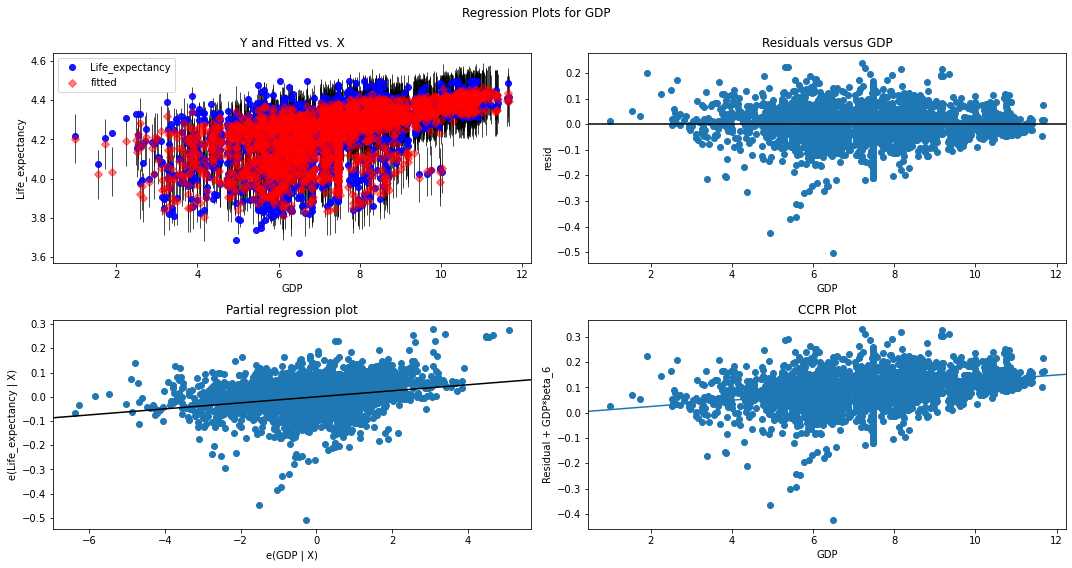

<Figure size 432x288 with 0 Axes>

In [65]:
#GDP
fig_15 = plt.figure(figsize=(15,8))
fig_15 = sm.graphics.plot_regress_exog( model_2,'GDP',fig=fig_15)
plt.show()
plt.tight_layout();

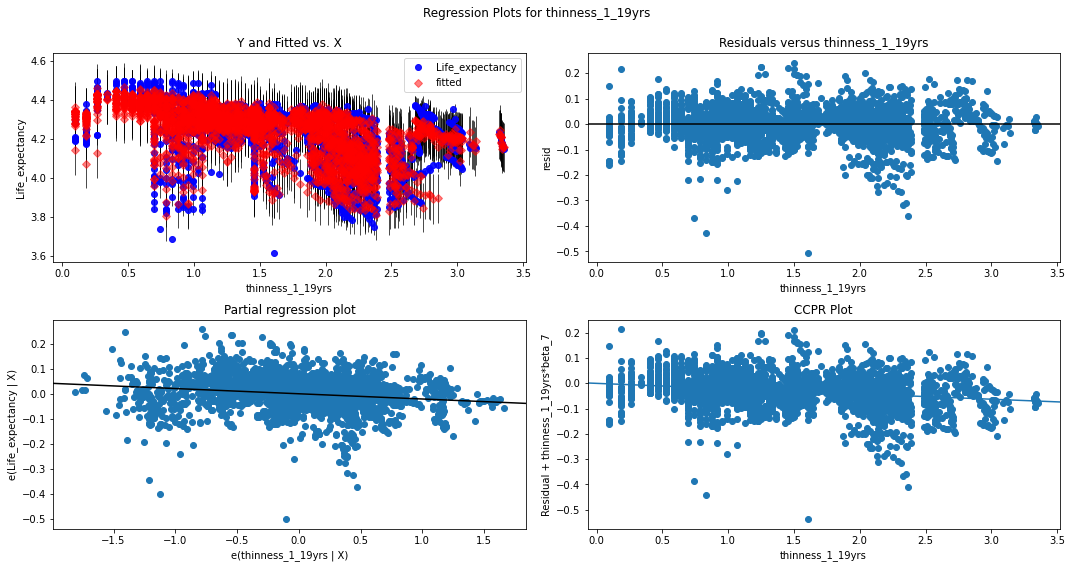

<Figure size 432x288 with 0 Axes>

In [66]:
#thinness_1_19yrs
fig_16 = plt.figure(figsize=(15,8))
fig_16 = sm.graphics.plot_regress_exog( model_2,'thinness_1_19yrs',fig=fig_16)
plt.show()
plt.tight_layout();

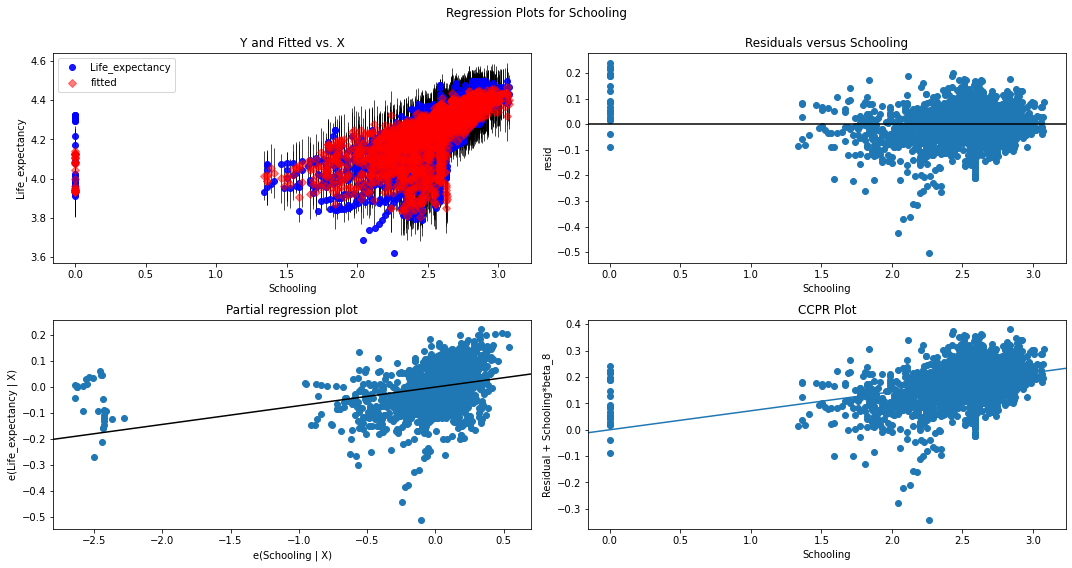

<Figure size 432x288 with 0 Axes>

In [67]:
#Schooling
fig_17 = plt.figure(figsize=(15,8))
fig_17 = sm.graphics.plot_regress_exog( model_2,'Schooling',fig=fig_17)
plt.show()
plt.tight_layout();

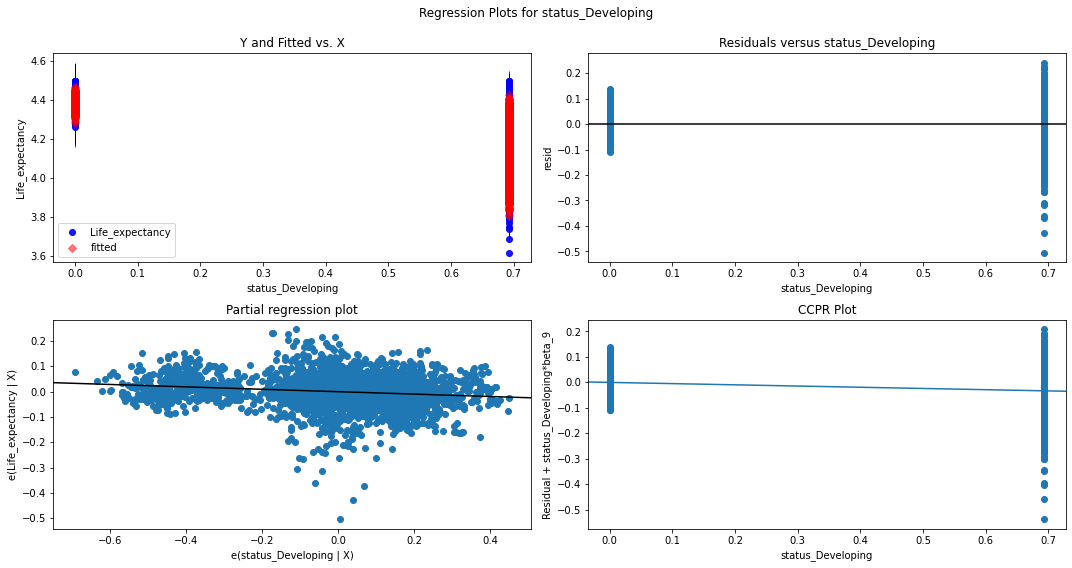

<Figure size 432x288 with 0 Axes>

In [68]:
#status_Developing
fig_18 = plt.figure(figsize=(15,8))
fig_18 = sm.graphics.plot_regress_exog( model_2,'status_Developing',fig=fig_18)
plt.show()
plt.tight_layout();

**QQ plot to check for normality**

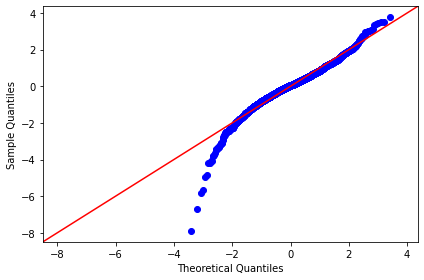

In [69]:
resid = model_2.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout();

After log transformation we can see our error residuals reduce to almost 0. Our adjusted R^2 is 0.804 indicating excellent goodness of fit with our linear regression model. Our residual plots are closer to homocesdascity. However our QQ plot is still not close to linear. Let's standardise our variables next, even though standardising variables does not make the distribution more normal, we can scale it so that all variables are homogenous in their magnitude potentially can improve our model consistency. 

**Final Model**
- This model is built with standardised features. 

**Standard Scaling**

In [70]:
adult_mortality_log = non_colin_df['Adult_Mortality']
BMI_log = non_colin_df['BMI']
polio_log = non_colin_df['Polio']
diphtheria_log = non_colin_df['Diphtheria']
HIV_AIDS_log = non_colin_df['HIV_AIDS']
GDP_log = non_colin_df['GDP']
thinness_log = non_colin_df['thinness_1_19yrs']
schooling_log = non_colin_df['Schooling']
status_dev_log = non_colin_df['status_Developing']

scaled_adult_mortality = (adult_mortality_log - np.mean(adult_mortality_log)) / np.sqrt(np.var(adult_mortality_log))
scaled_BMI = (BMI_log - np.mean(BMI_log)) / np.sqrt(np.var(BMI_log))
scaled_polio = (polio_log - np.mean(polio_log)) / np.sqrt(np.var(polio_log))
scaled_diphtheria = (diphtheria_log - np.mean(diphtheria_log)) / np.sqrt(np.var(diphtheria_log))
scaled_HIV_AIDS = (HIV_AIDS_log - np.mean(HIV_AIDS_log)) / np.sqrt(np.var(HIV_AIDS_log))
scaled_GDP = (GDP_log - np.mean(GDP_log)) / np.sqrt(np.var(GDP_log))
scaled_thinness = (thinness_log  - np.mean(thinness_log )) / np.sqrt(np.var(thinness_log))
scaled_schooling = (schooling_log  - np.mean(schooling_log)) / np.sqrt(np.var(schooling_log))
scaled_status_dev = (status_dev_log  - np.mean(status_dev_log)) / np.sqrt(np.var(status_dev_log))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['scaled_adult_mortality'] = scaled_adult_mortality
data_cont_scaled['scaled_BMI'] = scaled_BMI
data_cont_scaled['scaled_polio'] = scaled_polio
data_cont_scaled['scaled_diphtheria'] = scaled_diphtheria
data_cont_scaled['scaled_HIV_AIDS'] = scaled_HIV_AIDS
data_cont_scaled['scaled_GDP'] = scaled_GDP
data_cont_scaled['scaled_thinness'] = scaled_thinness
data_cont_scaled['scaled_schooling'] = scaled_schooling
data_cont_scaled['scaled_status_developing'] = scaled_status_dev

life_expectancy_df = non_colin_df['Life_expectancy']

final_df = pd.concat((life_expectancy_df,data_cont_scaled), axis=1)
final_df                                                        

Life_expectancy  scaled_adult_mortality  scaled_BMI  scaled_polio  \
0            4.189655                0.818205   -0.621272     -4.049416   
1            4.109233                0.847052   -0.654884     -0.422239   
2            4.109233                0.836335   -0.689365     -0.310619   
3            4.102643                0.850598   -0.724760     -0.180662   
4            4.097672                0.861159   -0.753768     -0.155821   
...               ...                     ...         ...           ...   
2933         3.813307                1.793055   -0.174208     -0.180662   
2934         3.817712                1.782318   -0.193338     -3.822199   
2935         3.824284               -0.410824   -0.212747     -0.036780   
2936         3.835142                1.742365   -0.232442      0.030843   
2937         3.850148                1.712367   -0.252432      0.074476   

      scaled_diphtheria  scaled_HIV_AIDS  scaled_GDP  scaled_thinness  \
0             -0.221048        -0.541994   -0.638176         1.963226   
1             -0.299527        -0.541994   -0.610635         1.986307   
2             -0.246804        -0.541994   -0.592892         2.001487   
3             -0.170686        -0.541994   -0.558853         2.016506   
4             -0.146058        -0.541994   -1.917999         2.038739   
...                 ...              ...         ...              ...   
2933          -0.221048         3.961585   -0.783845         1.173186   
2934          -0.146058         4.073643   -0.785141         1.226466   
2935          -0.074260         4.176841   -1.976517        -1.019762   
2936           0.016951         4.248460   -0.674680        -0.783922   
2937           0.082262         4.290206   -0.675979         1.375209   

      scaled_schooling  scaled_status_developing  
0            -0.308910                  0.459399  
1            -0.333956                  0.459399  
2            -0.359231                  0.459399  
3            -0.384738                  0.459399  
4            -0.462703                  0.459399  
...                ...                       ...  
2933         -0.542928                  0.459399  
2934         -0.462703                  0.459399  
2935         -0.333956                  0.459399  
2936         -0.384738                  0.459399  
2937         -0.384738                  0.459399  

[2938 rows x 10 columns]

In [71]:
outcome = 'Life_expectancy'
predictors = final_df.drop('Life_expectancy', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_3 = ols(formula=formula, data=final_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1344.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:38:10   Log-Likelihood:                 3916.0
No. Observations:                2938   AIC:                            -7812.
Df Residuals:                    2928   BIC:                            -7752.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.2419      0.001   3596.968      0.000       4.240       4.244
scaled_adult_mortality      -0.0131      0.001    -10.070      0.000      -0.016      -0.011
scaled_BMI                   0.0072      0.001      5.320      0.000       0.005       0.010
scaled_polio                 0.0086      0.001      6.230      0.000       0.006       0.011
scaled_diphtheria            0.0102      0.001      7.335      0.000       0.007       0.013
scaled_HIV_AIDS             -0.0782      0.001    -56.204      0.000      -0.081      -0.075
scaled_GDP                   0.0215      0.001     15.088      0.000       0.019       0.024
scaled_thinness             -0.0148      0.001     -9.956      0.000      -0.018      -0.012
scaled_schooling             0.0261      0.001     18.773      0.000       0.023       0.029
scaled_status_developing    -0.0125      0.001     -8.824      0.000      -0.015      -0.010
==============================================================================
Omnibus:                      469.690   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2213.671
Skew:                          -0.690   Prob(JB):                         0.00
Kurtosis:                       7.022   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_3 = non_colin_df.drop('Life_expectancy', axis=1)
y_3 = non_colin_df['Life_expectancy']
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3,y_3, random_state=22)
model_3k = LinearRegression()
model_3k.fit(X3_train, y3_train)

y3_hat_train = model_3k.predict(X2_train)
y3_hat_test = model_3k.predict(X2_test)

from sklearn.metrics import mean_squared_error
train_mse_3 = mean_squared_error(y3_train, y3_hat_train)
test_mse_3 = mean_squared_error(y3_test, y3_hat_test)
RSME_3 = test_mse_3 - train_mse_3
print('Train Mean Squared Error:', train_mse_3)
print('Test Mean Squared Error:', test_mse_3)
print('RMSE:', RSME_3)

Train Mean Squared Error: 0.03742441791173695
Test Mean Squared Error: 0.036934494440102446
RMSE: -0.0004899234716345055


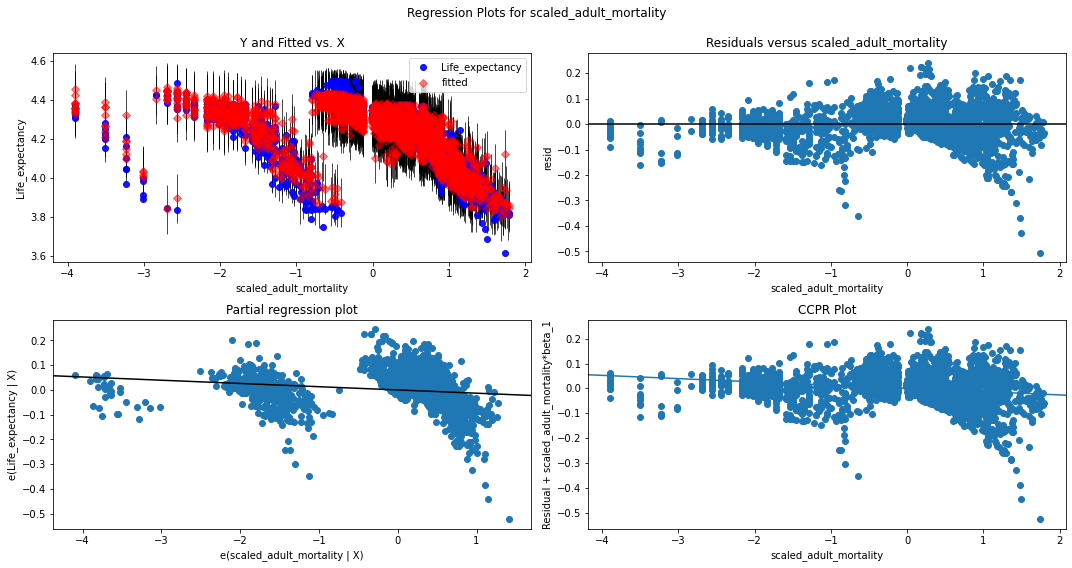

<Figure size 432x288 with 0 Axes>

In [73]:
#Adult Mortality 
fig_19 = plt.figure(figsize=(15,8))
fig_19 = sm.graphics.plot_regress_exog( model_3,'scaled_adult_mortality',fig=fig_19)
plt.show()
plt.tight_layout();

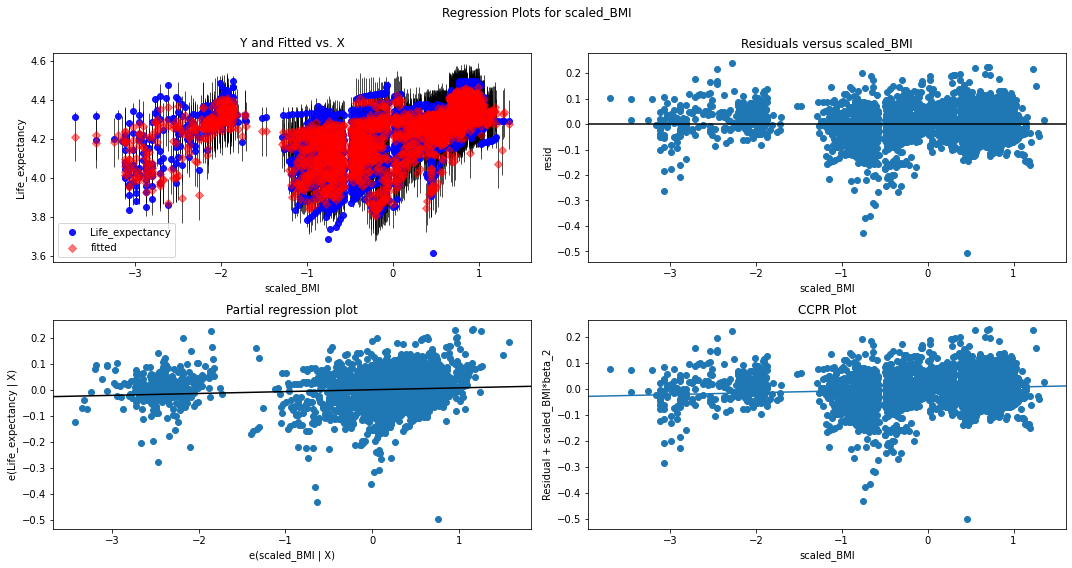

<Figure size 432x288 with 0 Axes>

In [74]:
#BMI
fig_20 = plt.figure(figsize=(15,8))
fig_20 = sm.graphics.plot_regress_exog( model_3,'scaled_BMI',fig=fig_20)
plt.show()
plt.tight_layout();

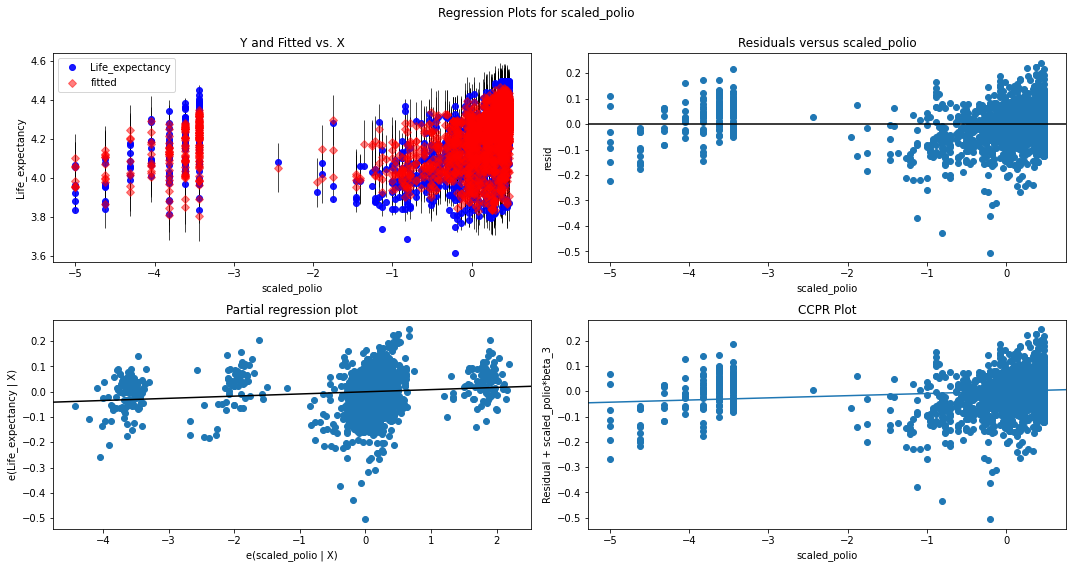

<Figure size 432x288 with 0 Axes>

In [75]:
#Polio
fig_21 = plt.figure(figsize=(15,8))
fig_21 = sm.graphics.plot_regress_exog(model_3,'scaled_polio',fig=fig_21)
plt.show()
plt.tight_layout();

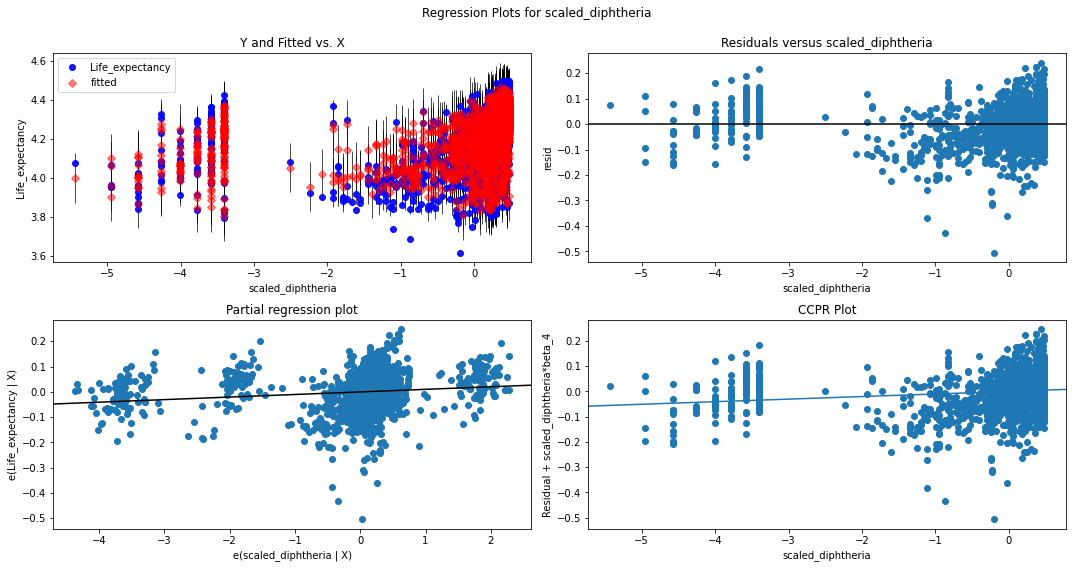

<Figure size 432x288 with 0 Axes>

In [76]:
#Diphtheria
fig_22 = plt.figure(figsize=(15,8))
fig_22 = sm.graphics.plot_regress_exog(model_3,'scaled_diphtheria',fig=fig_22)
plt.show()
plt.tight_layout();

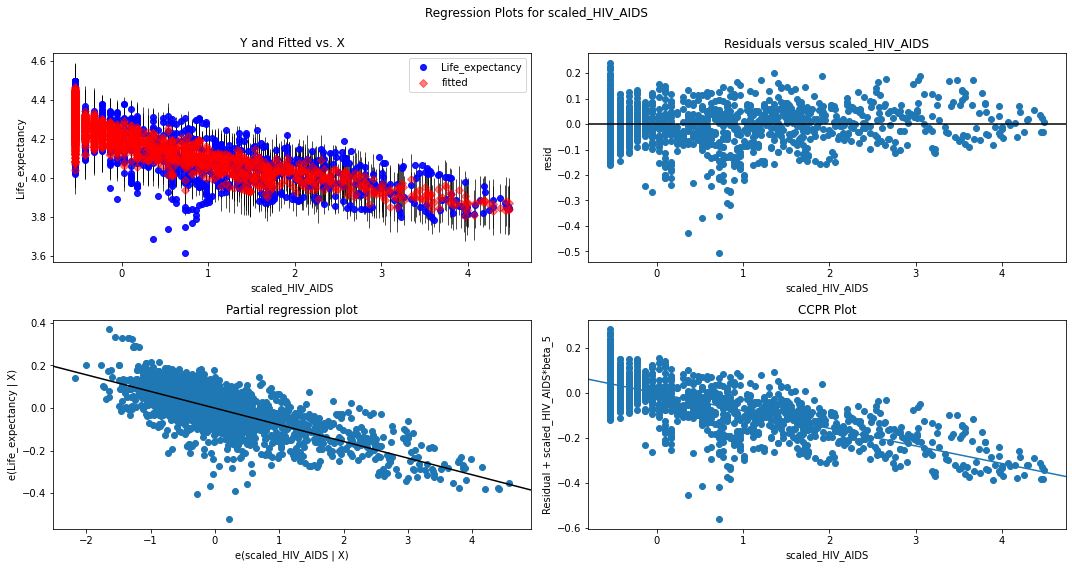

<Figure size 432x288 with 0 Axes>

In [77]:
#HIV_AIDS
fig_23 = plt.figure(figsize=(15,8))
fig_23 = sm.graphics.plot_regress_exog( model_3,'scaled_HIV_AIDS',fig=fig_23)
plt.show()
plt.tight_layout();

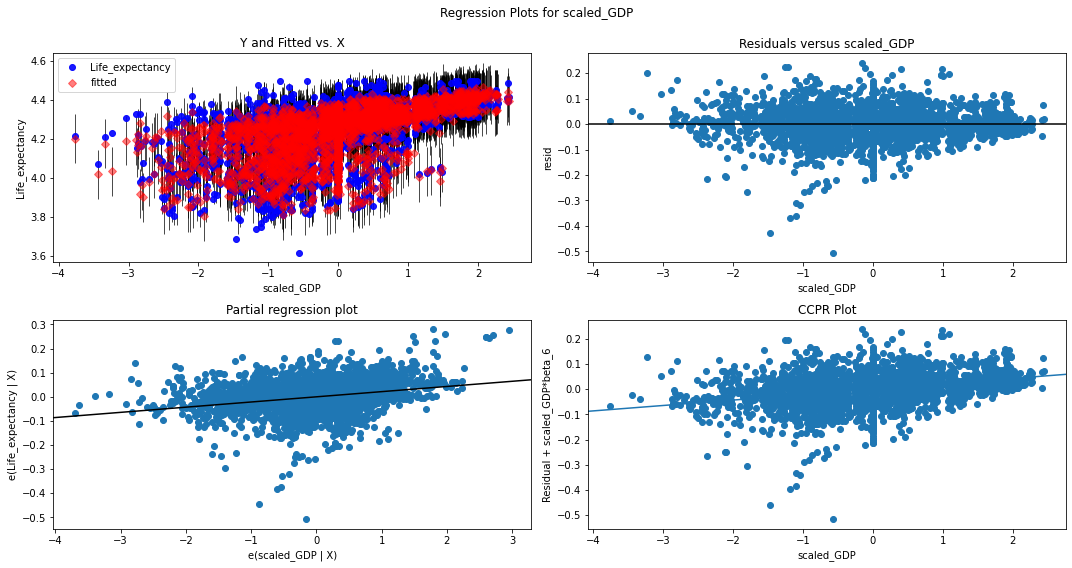

<Figure size 432x288 with 0 Axes>

In [78]:
#GDP
fig_24 = plt.figure(figsize=(15,8))
fig_24 = sm.graphics.plot_regress_exog( model_3,'scaled_GDP',fig=fig_24)
plt.show()
plt.tight_layout();

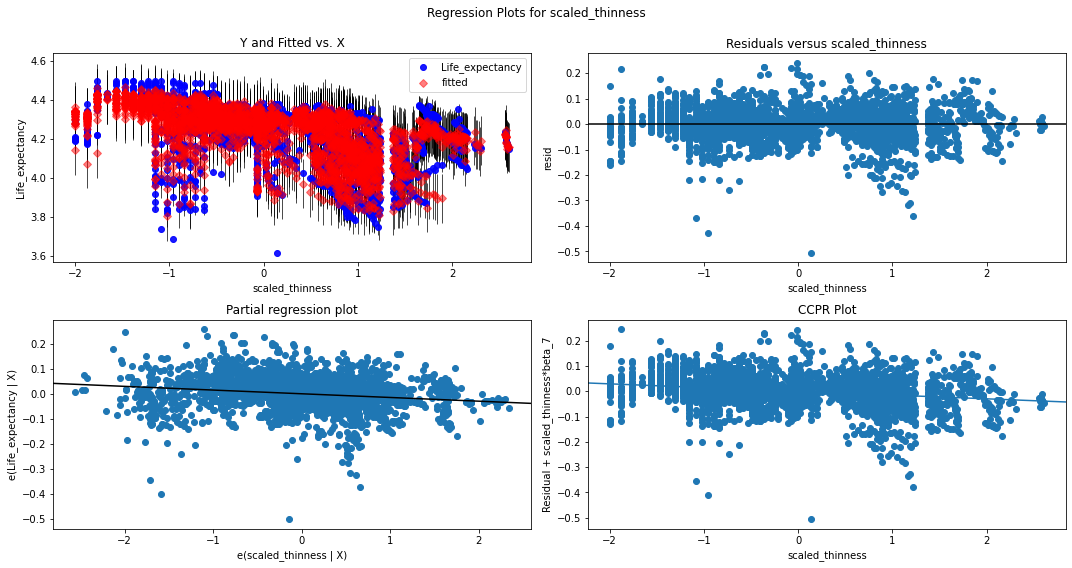

<Figure size 432x288 with 0 Axes>

In [79]:
#thinness_1_19yrs
fig_25 = plt.figure(figsize=(15,8))
fig_25 = sm.graphics.plot_regress_exog( model_3,'scaled_thinness',fig=fig_25)
plt.show()
plt.tight_layout();

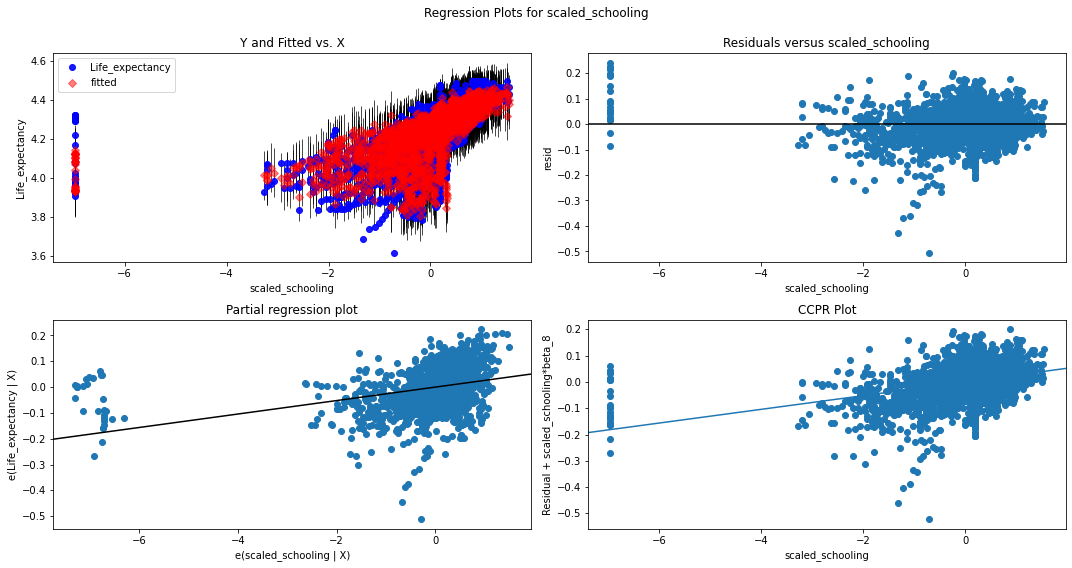

<Figure size 432x288 with 0 Axes>

In [80]:
#Schooling
fig_26 = plt.figure(figsize=(15,8))
fig_26 = sm.graphics.plot_regress_exog( model_3,'scaled_schooling',fig=fig_26)
plt.show()
plt.tight_layout();

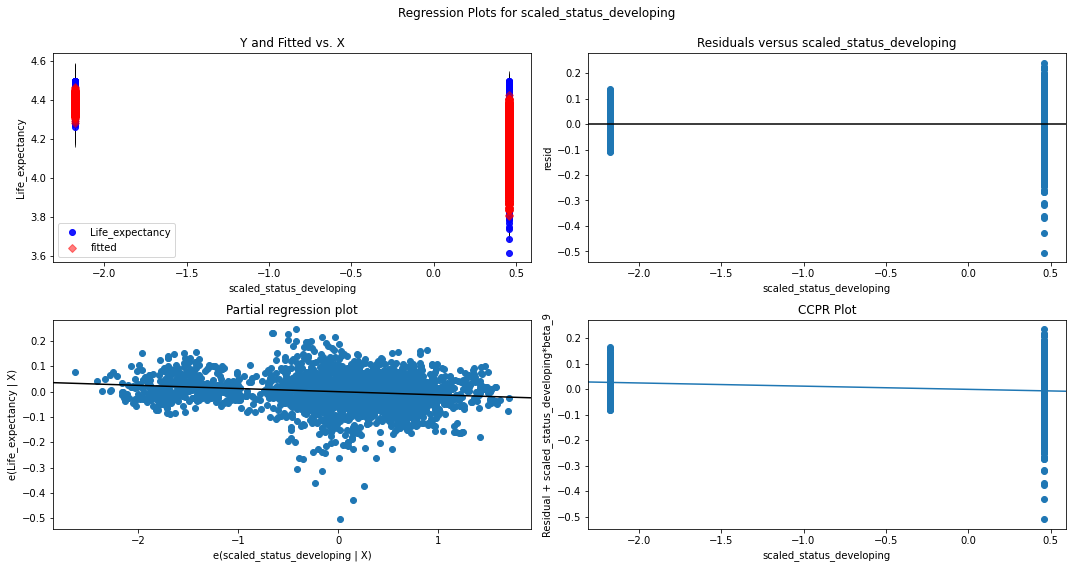

<Figure size 432x288 with 0 Axes>

In [81]:
#status_Developing
fig_27 = plt.figure(figsize=(15,8))
fig_27 = sm.graphics.plot_regress_exog( model_3,'scaled_status_developing',fig=fig_27)
plt.show()
plt.tight_layout();

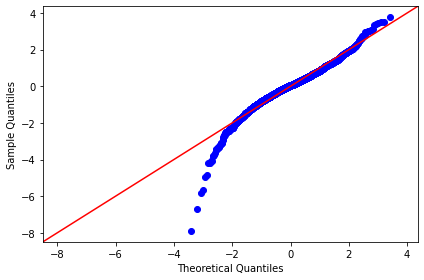

In [82]:
resid = model_3.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout();

Breusch-Pagan Lagrange Multiplier test for heteroscedasticity

In [83]:
resid_3 = model_3.resid
sm.stats.diagnostic.het_breuschpagan(resid_3, predictors)

(175.24430640344735,
 1.0252390052443723e-33,
 20.64326066604801,
 4.284232172411786e-34)

As we can see from the model_3 summary our Jarque-Bera value is unchanged further confirming our principle that standardisation does not make our variable distributions more normal however our Condition number significantly reduce from 177 from model_2 to 2.7 in model_3 indicating our other numerical problems has been resolved. However our QQ plot still does not indicate good normality. Sometimes, QQ-plot might not be accurate in assessing normality in large dataset therefore we reconfirm this by using the Breush-Pagan Test. It returned p-value for f-statistic of 6.42157988330463e-36 which is less than confidence level of alpha 0.05 then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.   

Adjusted R^2 at 0.804 and our residual errors values and RMSE are at almost 0 suggested our model has great fit to the dataset and it is not overfitting or underfitting. 

**Cross Validation**

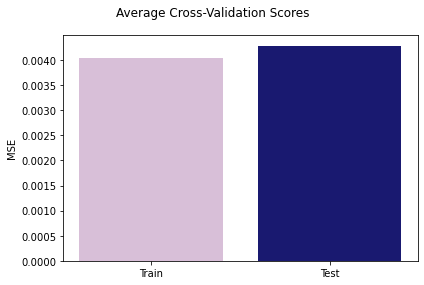

In [84]:
from sklearn.model_selection import cross_validate
linreg = LinearRegression()

X = final_df.drop('Life_expectancy', axis=1)
y = final_df['Life_expectancy']

cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

labels = ["Train", "Test"]
color = ['thistle', 'midnightblue']

fig_20, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color = color)
ax.set_ylabel("MSE")
fig_20.suptitle("Average Cross-Validation Scores")
plt.tight_layout();

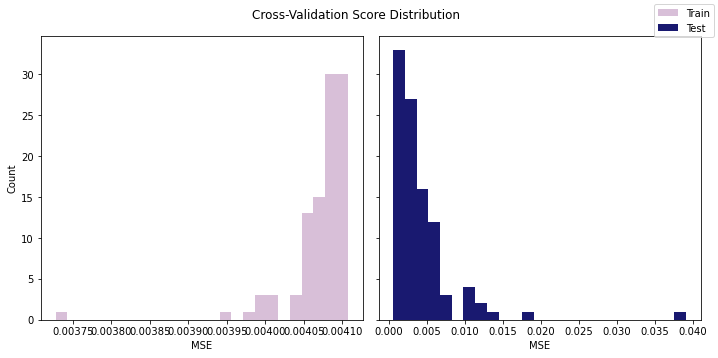

In [85]:
cross_val_results = cross_validate(linreg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig_28, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color='thistle')
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color='midnightblue')
right.set_xlabel("MSE")
fig_28.suptitle("Cross-Validation Score Distribution")
fig_28.legend()
plt.tight_layout();

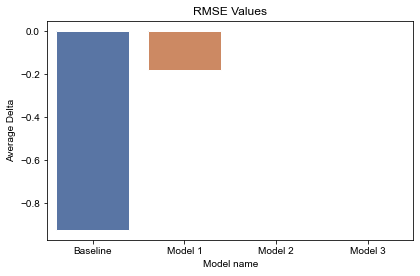

In [86]:
RMSE_values = [RSME_0,RSME_1, RSME_2, RSME_3]
baseline_names =['Baseline', 'Model 1', 'Model 2', 'Model 3']


plt.bar(baseline_names, height=RMSE_values)
plt.title('RMSE Values')
plt.xlabel('Model name')
plt.ylabel('Average Delta');

sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x=baseline_names, y=RMSE_values).set(title='RMSE Values', xlabel='Model name', ylabel='Average Delta')
plt.tight_layout();

## Evaluation
The final model is able to produce almost zero residual both in the test and train group which means that within linear regression this model is very accurate. With a neglegible RMSE value close to 0, this model does not seem to be underfit or overfit. It has reasonable ability to generalise beyond the dataset. Jarque-Bera score improved from 389.55 in baseline model to 2.7 in final model, indicating improvement in normality. However our QQ-plot showed non-linear relationship and also our Breusch-Pagan Lagrange Multiplier test for heteroscedasticity recomfirmed heteroskedasticity. On the other hand, our residual plots of the model also shows ok homocesdascity in some variables. Our adjusted R2 value is only 0.804 which means that this model can explain 80.4% changes in the dependent variable i.e the features in this multilinear regression model can explain 80.4% of the variance in life expectancy. This adjusted R2 value indicates that linear regression is a very good fit for this dataset. I am confident that this model can accurate predict property value based on RSME results from cross validation and the model has strong inference abilty given the high adjusted R2 value. Therefore, this model maybe useful in accurately predicting life expectancy values and accurately explain how each features will affect life expectancy. However our linear regression model failed to satisfy the homoskedasticity assumption which questions the suitability of linear regression model. 

## Conclusions
From our final model summary, the estimated value of the coefficient indicates how strongly each factors affect life expectancy. We found 9 significant factors that affect life expectancy. They are Adult Mortality, BMI, Polio, Diphtheria, HIV_AIDS, GDP, thinness_1_19yrs, Schooling, status_Developing. HIV/AIDS has the highest estimated value of coefficient meaning this factor affects negatively affect life expectancy the most. We also found that Polio and Diphtheria immunisation does have positive effect on life expectancy. Population does not have an effect on life expectancy as it was eliminated in the stepwise selection process and it has p-value 0.972 and a significantly low correlation coefficient with life expectancy. We found that the number of years of schooling does have a postive correlation relationship and is a significant factor in life expectancy value. From this model, countries with high HIV/AIDS rate should focus on lowering it and increase their Polio, Diphtheria immunisation rate and invest in education. Countries should pay attention to all 9 factors affecting life expetancy. 

**Limitations:**

This data set only includes data from 2000-2015 perhaps more updated dataset would provide a more accurate of current life expectancy. 

Our linear regression model did not satisfy the homoceskedasticity assumptions perhaps a non-linear model is a more suitable model for this dataset. 